# Job Demonstration


## Data import and clean

In [278]:
# All packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import imblearn # SMOTE

from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [279]:
# df1.to_csv('data_set.csv')
# df1 = pd.read_csv('data_set.csv')

In [6]:
# Self-made functions
from scipy.stats import ttest_ind

def summary_stat(data,var_list):
    ttl = len(data)
    out = []
    for i in var_list:
        out.append([i, 
                    data[i].count(), 
                    data[i].isnull().sum(), 
                    "{:.2%}".format(data[i].isnull().sum()/ttl), 
                    "{:.1f}".format(data[i].mean(skipna=True)), 
                    "{:.1f}".format(data[i].std(skipna=True)), 
                    data[i].min(skipna=True), 
                    data[i].dropna().quantile(.05), 
                    data[i].dropna().quantile(.25), 
                    data[i].dropna().quantile(.50), 
                    data[i].dropna().quantile(.75), 
                    data[i].dropna().quantile(.95), 
                    data[i].max(skipna=True) ])
    out = pd.DataFrame(out)
    out.columns = ['Variable', 'N', '# Miss', '% Miss', 'Mean', 'STD', 'Min', '5%', '25%', '50%', '75%', '95%', 'Max']
    return out


def sample_comp(data1, data2, x_var_list):
    compare_table = []
    for i in x_var_list:
        compare_table.append([i, np.mean(data1[i]), np.mean(data2[i]), round(ttest_ind(data1[i], data2[i]).pvalue,3)])
    compare_table = pd.DataFrame(compare_table)
    compare_table.columns = ['Variable', 'Small Sample', 'Full Sample', 't-test p-value']
    return compare_table

In [2]:
df = pd.read_csv('Marketing Campaign Data.csv', sep='"";""|"";"')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42600 entries, 0 to 42599
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   """age       42600 non-null  object 
 1   job          41191 non-null  object 
 2   marital      41262 non-null  object 
 3   education    41940 non-null  object 
 4   default      42600 non-null  object 
 5   balance      42600 non-null  int64  
 6   housing      42600 non-null  object 
 7   loan         40004 non-null  object 
 8   contact      42600 non-null  object 
 9   day          42600 non-null  int64  
 10  month        42600 non-null  object 
 11  duration     42600 non-null  int64  
 12  campaign     42600 non-null  int64  
 13  pdays        42600 non-null  int64  
 14  previous     42600 non-null  int64  
 15  poutcome     42600 non-null  object 
 16  y            42600 non-null  object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(1), int64(6), object(11)
memory usa

In [3]:
df = df.iloc[:-1]
df_columns = list(df.columns)
df_columns[0] = 'age'
df.columns = df_columns
df1 = df[df_columns[:-1]]
df1['age'] = df1.apply(lambda x: x['age'].replace('"',''),axis=1)
df1['age'] = np.where(df1['age'] == 'NULL', np.nan, df1['age'])
df1['age'] = np.where(df1['age'].isna(), np.nan, df1['age'].astype(float))

In [4]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36.0,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
1,57.0,technician,married,unknown,no,206,yes,no,unknown,5,may,216,3,-1,0,unknown,no
2,54.0,services,married,secondary,yes,0,yes,no,unknown,6,may,138,3,-1,0,unknown,no
3,51.0,blue-collar,married,secondary,no,50,yes,yes,unknown,6,may,121,1,-1,0,unknown,no
4,49.0,technician,married,unknown,no,15,no,no,unknown,6,may,92,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42594,36.0,technician,single,NaN,no,54,no,NaN,cellular,22,may,563,1,-1,0,unknown,no
42595,28.0,unemployed,single,NaN,no,0,no,NaN,cellular,6,feb,15,9,-1,0,unknown,no
42596,NaN,blue-collar,married,NaN,no,175,yes,NaN,cellular,4,feb,430,2,272,3,other,no
42597,NaN,blue-collar,married,NaN,no,4,yes,NaN,cellular,8,jul,173,1,-1,0,unknown,no


## Exploratory data analysis    

### Uni-variate analysis 

#### Missing value check

In [104]:
ttl = 42599
out = []
for i in list(df1.columns):
    out.append([i, df1[i].isnull().sum(), "{:.2%}".format(df1[i].isnull().sum()/42599)])
out = pd.DataFrame(out)
out.columns = ['variable', '# Miss', '% Miss']
out

,variable,# Miss,% Miss
0,age,2656,6.23%
1,job,1409,3.31%
2,marital,1338,3.14%
3,education,659,1.55%
4,default,0,0.00%
5,balance,0,0.00%
6,housing,0,0.00%
7,loan,2595,6.09%
8,contact,0,0.00%
9,day,0,0.00%


As a summary, the variables with missing value consist of **age**, **job**, **marital**, **education** and **loan**, where age is a numeric variable and others are categorical variables.

#### Categorical variable

In [157]:
cate_var_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for i in cate_var_list:
    print('---------------------------------------------')
    print('Variable: '+i)
    print(df1[i].value_counts())

---------------------------------------------
Variable: job
blue-collar      9186
management       8593
technician       6976
admin.           4670
services         3879
retired          1779
self-employed    1462
entrepreneur     1395
unemployed       1168
housemaid        1110
student           715
unknown           257
Name: job, dtype: int64
---------------------------------------------
Variable: marital
married     24962
single      11507
divorced     4792
Name: marital, dtype: int64
---------------------------------------------
Variable: education
secondary    21678
tertiary     12180
primary       6427
unknown       1655
Name: education, dtype: int64
---------------------------------------------
Variable: default
no     41790
yes      809
Name: default, dtype: int64
---------------------------------------------
Variable: housing
yes    24429
no     18170
Name: housing, dtype: int64
---------------------------------------------
Variable: loan
no     33408
yes     6596
Name: loan,

In [170]:
def month_num(var):
    if var == 'may':
        return 5
    elif var == 'jun': 
        return 6       
    elif var == 'jul': 
        return 7       
    elif var == 'aug': 
        return 8       
    elif var == 'oct': 
        return 10       
    elif var == 'nov': 
        return 11       
    elif var == 'jan': 
        return 1       
    elif var == 'feb': 
        return 2       
    elif var == 'mar': 
        return 3       
    elif var == 'apr': 
        return 4       
    elif var == 'sep': 
        return 9       
    elif var == 'dec':
        return 12     
    
df1['mth'] = df1.apply(lambda x: month_num(x['month']), axis = 1)

In [25]:
def bar_plot(data,var):
    ax = sns.countplot(x=var, data=data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title('The bar plot of number of '+var+' by classes')
    plt.show()

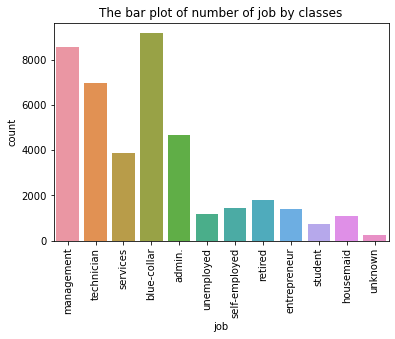

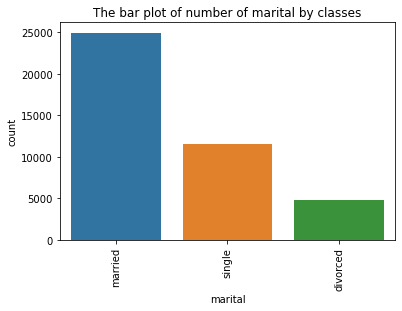

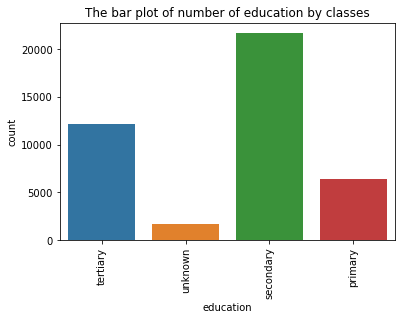

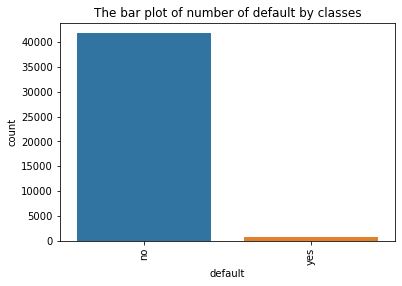

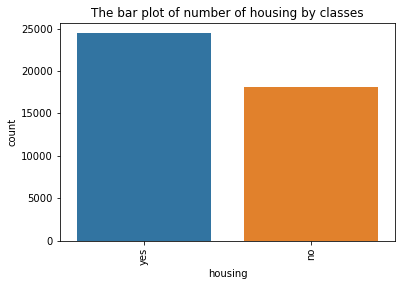

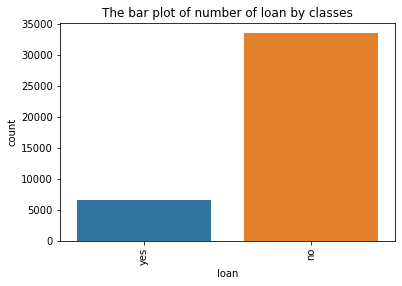

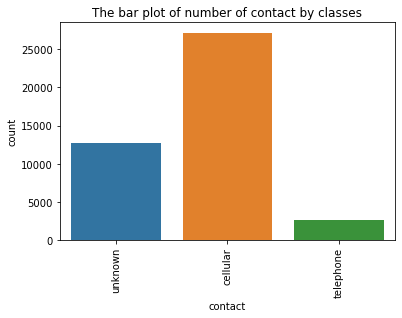

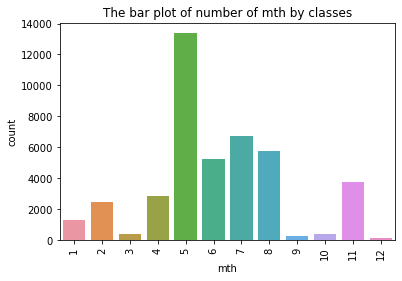

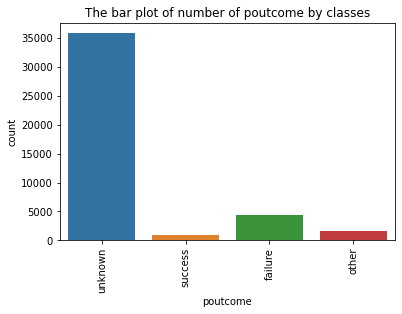

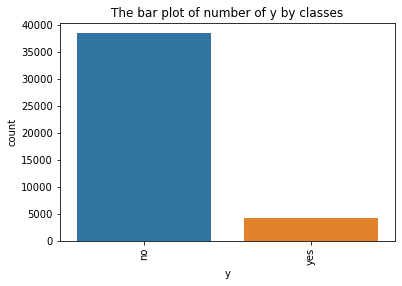

In [172]:
for var in ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'mth', 'poutcome', 'y']:
    bar_plot(df1,var)

#### Numeric Variable  

##### Summary

In [65]:
num_var_list = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
summary_stat(df1,num_var_list)

,Variable,N,# Miss,% Miss,Mean,STD,Min,5%,25%,50%,75%,95%,Max
0,age,39943,2656,6.23%,40.7,10.2,18.0,27.0,33.0,39.0,48.0,58.0,95.0
1,balance,42599,0,0.00%,1329.3,2999.0,-8019.0,-191.0,65.0,432.0,1384.5,5701.3,102127.0
2,day,42599,0,0.00%,15.9,8.3,1.0,3.0,8.0,16.0,21.0,29.1,31.0
3,duration,42599,0,0.00%,256.5,257.9,0.0,34.0,102.0,178.0,317.0,753.0,4918.0
4,campaign,42599,0,0.00%,2.8,3.2,1.0,1.0,1.0,2.0,3.0,8.0,63.0
5,pdays,42599,0,0.00%,36.2,95.9,-1.0,-1.0,-1.0,-1.0,-1.0,309.0,850.0
6,previous,42599,0,0.00%,0.5,2.3,0.0,0.0,0.0,0.0,0.0,3.0,275.0


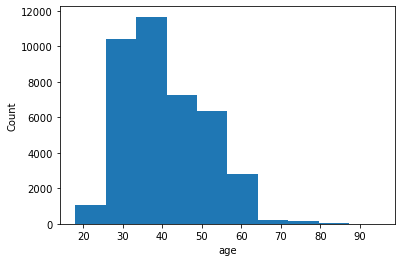

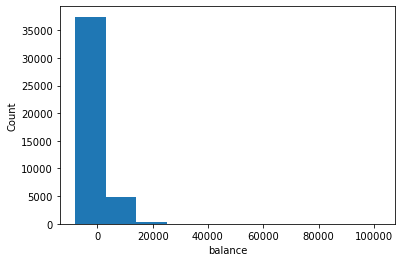

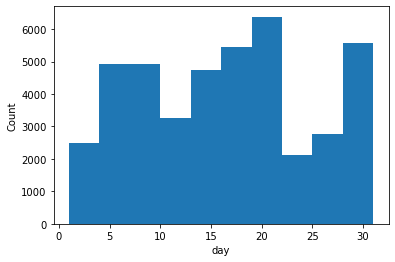

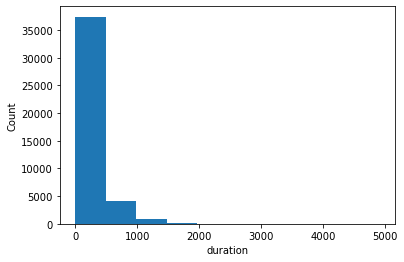

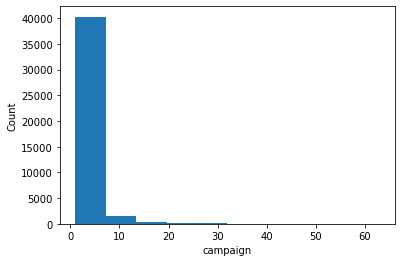

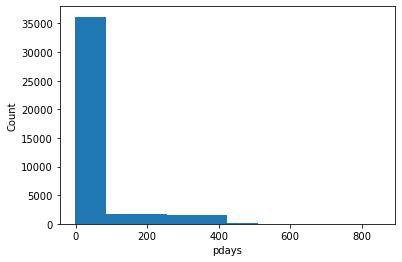

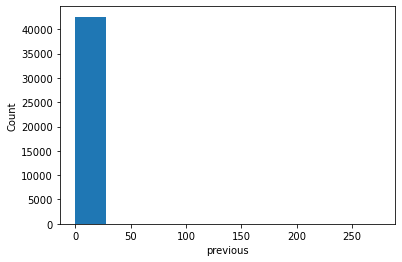

In [30]:
for i in num_var_list: 
    plt.hist(df1[i].dropna())
    plt.xlabel(i)
    plt.ylabel('Count')    
    plt.show()

##### Special values


-pdays: number of days that passed by after the client was last contacted from a previous campaign 

(numeric, -1 means client was not previously contacted) 

Create another flag for -1 case

In [14]:
df1['pdays_neg_1'] = np.where(df1['pdays'] == -1, 1, 0)

In [24]:
df1['pdays_neg_1'].value_counts()

1    35776
0     6823
Name: pdays_neg_1, dtype: int64

(array([3.6177e+04, 1.6510e+03, 1.7030e+03, 1.5130e+03, 1.4500e+03,
        5.5000e+01, 2.5000e+01, 7.0000e+00, 7.0000e+00, 1.1000e+01]),
 array([ -1. ,  84.1, 169.2, 254.3, 339.4, 424.5, 509.6, 594.7, 679.8,
        764.9, 850. ]),
 <BarContainer object of 10 artists>)

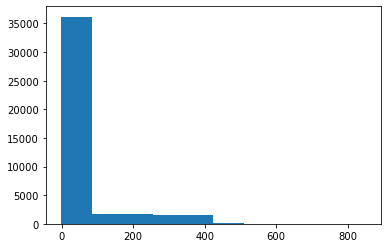

In [15]:
plt.hist(df1[df1['pdays_neg_1']!=-1]['pdays'].dropna())

### Bi-variate analysis against y

#### Categorical variable

In [176]:
def bar_plot_by_group(data, var, group_var):
    ax = sns.countplot(x=var, hue=group_var, data=data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title('The bar plot of number of '+var+' by classes')
    plt.show()

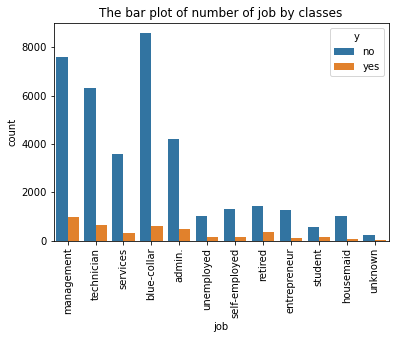

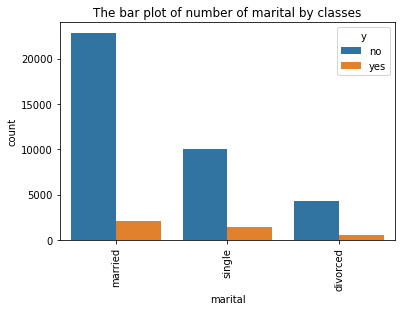

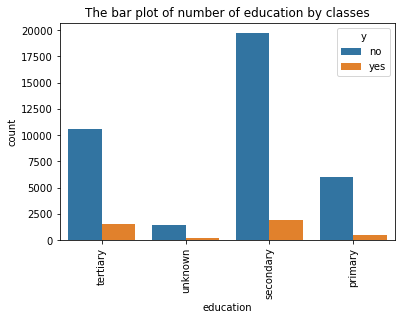

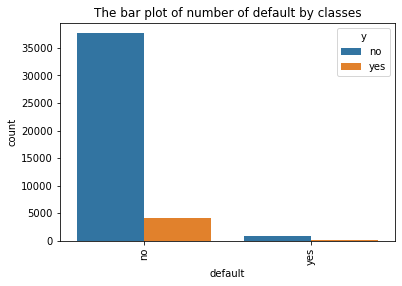

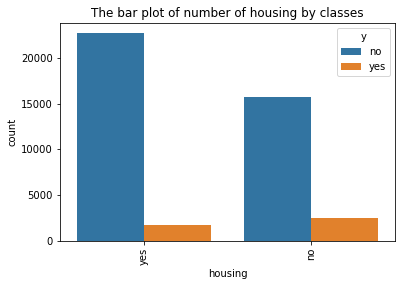

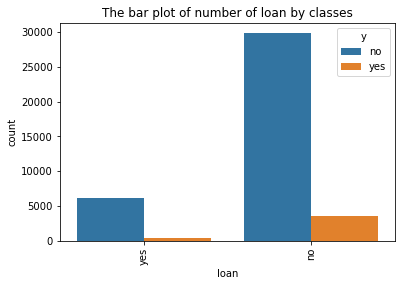

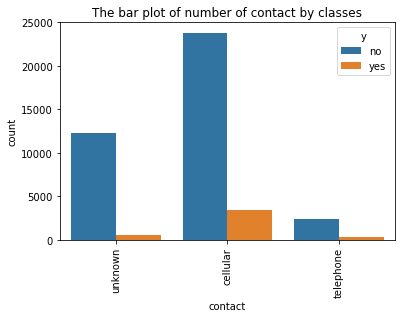

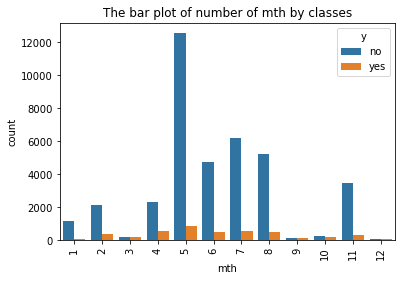

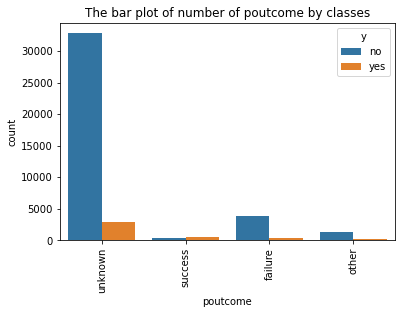

In [177]:
for var in ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'mth', 'poutcome']:
    bar_plot_by_group(df1,var,'y')

In [182]:
def bar_plot_by_group_pct(data, var, group_var,y = 'proportion'):
    dta = data[var].groupby(data[hue]).value_counts(normalize=True).rename(y).reset_index()
    ax = sns.barplot(x=var, y=y, hue=group_var, data=dta)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title('The bar plot of pct of '+var+' by classes')
    plt.show()

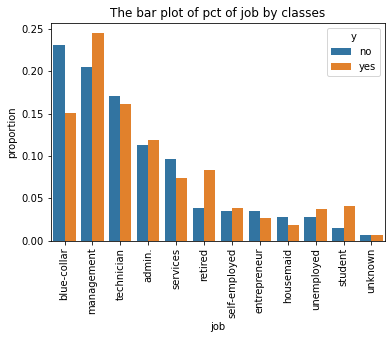

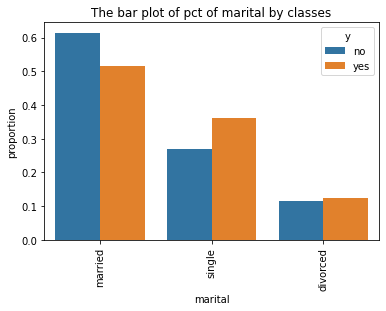

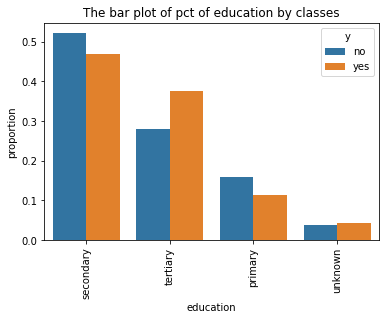

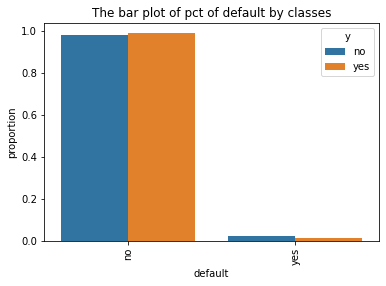

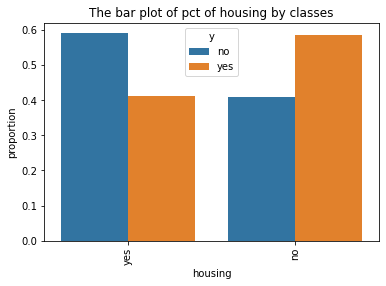

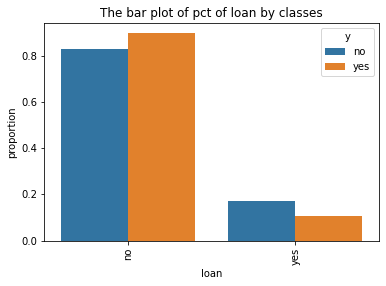

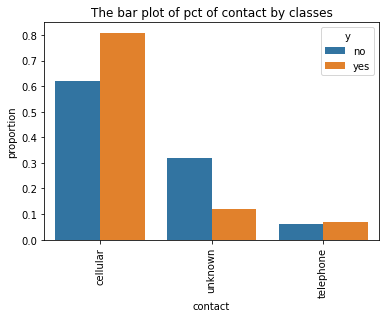

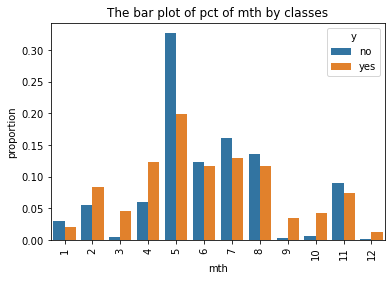

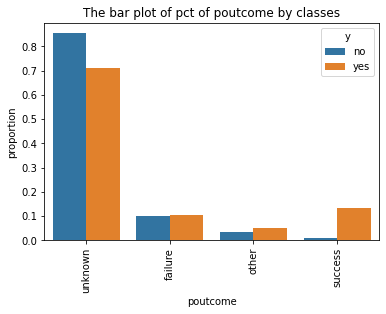

In [184]:
for var in ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'mth', 'poutcome']:
    bar_plot_by_group_pct(df1,var,'y')

#### Continuous variable

In [201]:
def cat_plot_by_group(data, xvar, yvar, kind="box"):
    ax = sns.catplot(x=xvar, y=yvar, kind=kind, data=data)

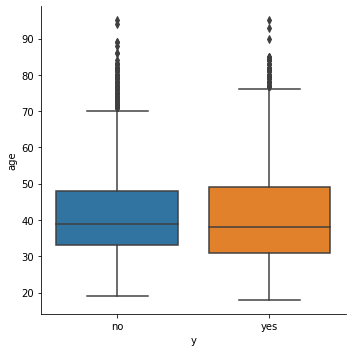

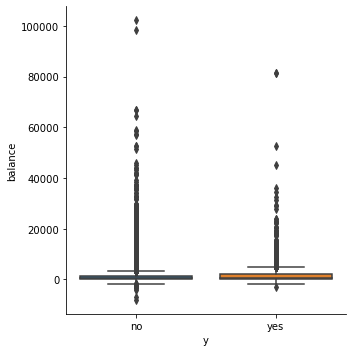

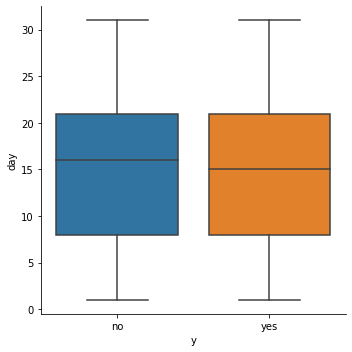

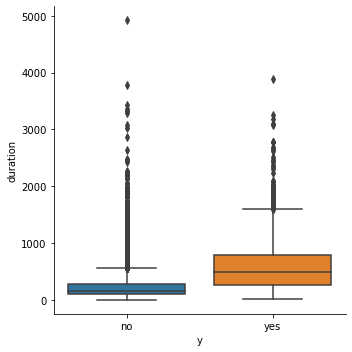

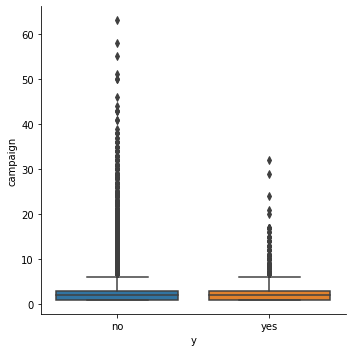

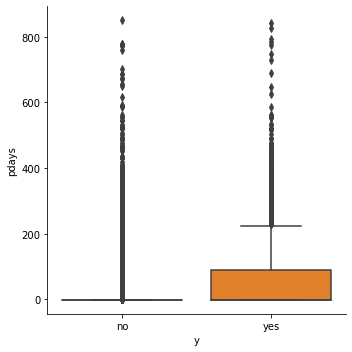

In [202]:
num_var_list = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']
for var in num_var_list:
    cat_plot_by_group(df1,'y',var)

## Modeling data treatment / Feature Engineering  

### Missing value imputation strategy   

- Age: Median
- Job, Marital, Loan: Flagged as "missing"

In [55]:
df1['age_im'] = df1['age'].fillna(df1['age'].median())
df1['job_im'] = df1['job'].fillna('Miss')
df1['marital_im'] = df1['marital'].fillna('Miss')
df1['loan_im'] = df1['loan'].fillna('Miss')

In [13]:
ttl = 42599
out = []
for i in list(df1.columns):
    out.append([i, df1[i].isnull().sum(), "{:.2%}".format(df1[i].isnull().sum()/42599)])
out = pd.DataFrame(out)
out.columns = ['variable', '# Miss', '% Miss']
out

,variable,# Miss,% Miss
0,age,2656,6.23%
1,job,1409,3.31%
2,marital,1338,3.14%
3,education,659,1.55%
4,default,0,0.00%
5,balance,0,0.00%
6,housing,0,0.00%
7,loan,2595,6.09%
8,contact,0,0.00%
9,day,0,0.00%


### Special value treatment  

As balance, duration, campaign and pdays are skewned to right, I cap these variables at 99 percentile.

In [31]:
for i in ['balance', 'duration', 'campaign', 'pdays', 'previous']:
    df1[i+'_im'] = np.where(df1[i] > df1[i].quantile(.99), df1[i].quantile(.99), df1[i])

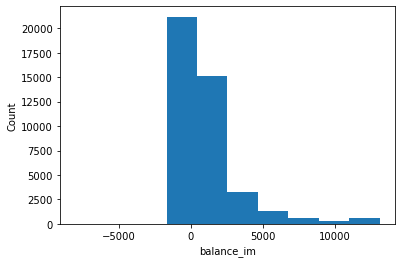

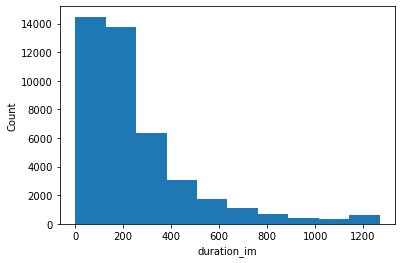

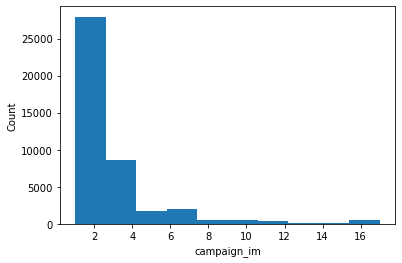

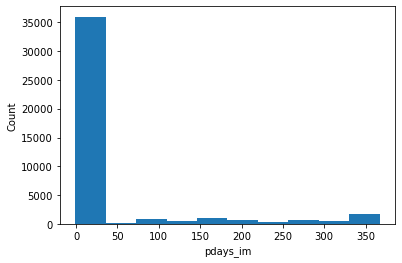

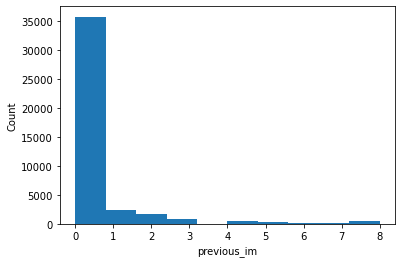

In [32]:
for i in [x + '_im' for x in ['balance', 'duration', 'campaign', 'pdays', 'previous']]: 
    plt.hist(df1[i])
    plt.xlabel(i)
    plt.ylabel('Count')    
    plt.show()

### Categorical variable encoding

**Categorical/Discrete variable**
job_im, marital_im, education, contact

**Binary variables**
default, housing, default, loan_im, y

**Numeric variable**
age_im, balance_im, day, duration_im, campaign_im, pdays_im, pdays_neg_1, previous

#### Multi-class categorical variables

In [391]:
cate_var_list = ['job_im', 'marital_im', 'education', 'contact', 'poutcome']

for i in cate_var_list:
    print('---------------------------------------------')
    print('Variable: '+i)
    print(df1[i].value_counts())

---------------------------------------------
Variable: job_im
blue-collar      9186
management       8593
technician       6976
admin.           4670
services         3879
retired          1779
self-employed    1462
Miss             1409
entrepreneur     1395
unemployed       1168
housemaid        1110
student           715
unknown           257
Name: job_im, dtype: int64
---------------------------------------------
Variable: marital_im
married     24962
single      11507
divorced     4792
Miss         1338
Name: marital_im, dtype: int64
---------------------------------------------
Variable: education
secondary    21678
tertiary     12180
primary       6427
unknown       1655
Name: education, dtype: int64
---------------------------------------------
Variable: contact
cellular     27213
unknown      12767
telephone     2619
Name: contact, dtype: int64
---------------------------------------------
Variable: poutcome
unknown    35779
failure     4314
other       1592
success      914


In [392]:
# Job 
df1['job_blue_collar'] = np.where(df1['job_im'] == 'blue-collar', 1, 0)
df1['job_management']  = np.where(df1['job_im'] == 'management', 1, 0)
df1['job_admin']  = np.where(df1['job_im'] == 'admin.', 1, 0)
df1['job_services'] = np.where(df1['job_im'] == 'services', 1, 0)
df1['job_no_ft_work'] = np.where(df1['job_im'].isin(['retired', 'unemployed', 'student']), 1, 0)

# Marital
df1['marital_married'] = np.where(df1['marital_im'] == 'married', 1, 0)
df1['marital_single']  = np.where(df1['marital_im'] == 'single', 1, 0)

# Education
df1['education_secondary'] = np.where(df1['education'] == 'secondary', 1, 0)
df1['education_tertiary']  = np.where(df1['education'] == 'tertiary', 1, 0)

# contact
df1['contact_cellular'] = np.where(df1['contact'] == 'cellular', 1, 0)
df1['contact_unknown']  = np.where(df1['contact'] == 'unknown', 1, 0)

# poutcome
df1['poutcome_success'] = np.where(df1['poutcome'] == 'success', 1, 0)
df1['poutcome_unknown']  = np.where(df1['poutcome'] == 'unknown', 1, 0)

#### Binary variables

In [35]:
cate_var_list = ['default', 'housing', 'default', 'loan_im', 'y']

for i in cate_var_list:
    print('---------------------------------------------')
    print('Variable: '+i)
    print(df1[i].value_counts())

---------------------------------------------
Variable: default
no     41790
yes      809
Name: default, dtype: int64
---------------------------------------------
Variable: housing
yes    24429
no     18170
Name: housing, dtype: int64
---------------------------------------------
Variable: default
no     41790
yes      809
Name: default, dtype: int64
---------------------------------------------
Variable: loan_im
no      33408
yes      6596
Miss     2595
Name: loan_im, dtype: int64
---------------------------------------------
Variable: y
no     38399
yes     4200
Name: y, dtype: int64


In [36]:
for i in ['default', 'housing', 'default', 'loan_im', 'y']:
    df1[i+'_n'] = np.where(df1[i]=='yes', 1, 0)

df1['loan_miss'] = np.where(df1['loan_im']=='Miss', 1, 0)

#### Re-run special case and time fixed effect

In [47]:
def month_num(var):
    if var == 'may':
        return 5
    elif var == 'jun': 
        return 6       
    elif var == 'jul': 
        return 7       
    elif var == 'aug': 
        return 8       
    elif var == 'oct': 
        return 10       
    elif var == 'nov': 
        return 11       
    elif var == 'jan': 
        return 1       
    elif var == 'feb': 
        return 2       
    elif var == 'mar': 
        return 3       
    elif var == 'apr': 
        return 4       
    elif var == 'sep': 
        return 9       
    elif var == 'dec':
        return 12     
    
df1['mth'] = df1.apply(lambda x: month_num(x['month']), axis = 1)
df1['pdays_neg_1'] = np.where(df1['pdays'] == -1, 1, 0)

In [49]:
df1['q1_flag'] = np.where(df1['month'].isin(['jan','feb','mar']), 1, 0)
df1['q2_flag'] = np.where(df1['month'].isin(['apr','may','jun']), 1, 0)
df1['q3_flag'] = np.where(df1['month'].isin(['jul','aug','sep']), 1, 0)

#### Final candidate variable pool

In [393]:
x_var_list=['age_im', 'balance_im', 'q1_flag', 'q2_flag', 'q3_flag', 'duration_im', 'campaign_im', 
            'pdays_im', 'pdays_neg_1', 'previous_im', 'default_n', 'housing_n', 'loan_im_n', 'loan_miss',   
            'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work', 
            'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 
            'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']
summary_stat(df1, ['y_n'] + x_var_list)

,Variable,N,# Miss,% Miss,Mean,STD,Min,5%,25%,50%,75%,95%,Max
0,y_n,42599,0,0.00%,0.1,0.3,0.0,0.0,0.0,0.0,0.0,1.0,1.00
1,age_im,42599,0,0.00%,40.6,9.8,18.0,27.0,33.0,39.0,47.0,58.0,95.00
2,balance_im,42599,0,0.00%,1244.0,2229.4,-8019.0,-191.0,65.0,432.0,1384.5,5701.3,13099.16
3,q1_flag,42599,0,0.00%,0.1,0.3,0.0,0.0,0.0,0.0,0.0,1.0,1.00
4,q2_flag,42599,0,0.00%,0.5,0.5,0.0,0.0,0.0,1.0,1.0,1.0,1.00
5,q3_flag,42599,0,0.00%,0.3,0.5,0.0,0.0,0.0,0.0,1.0,1.0,1.00
6,duration_im,42599,0,0.00%,252.7,235.2,0.0,34.0,102.0,178.0,317.0,753.0,1269.04
7,campaign_im,42599,0,0.00%,2.8,2.7,1.0,1.0,1.0,2.0,3.0,8.0,17.00
8,pdays_im,42599,0,0.00%,35.7,93.5,-1.0,-1.0,-1.0,-1.0,-1.0,309.0,367.00
9,pdays_neg_1,42599,0,0.00%,0.8,0.4,0.0,0.0,1.0,1.0,1.0,1.0,1.00


## Exploratory data analysis after feature engineering

In [292]:
import matplotlib.ticker as mtick

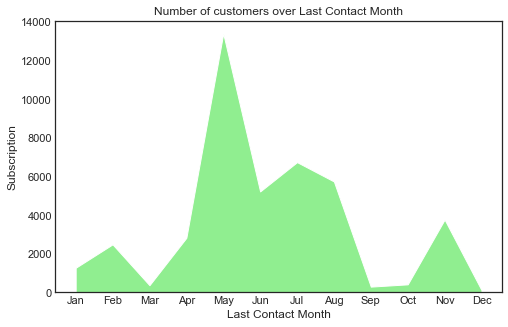

In [326]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription'
xvar = 'mth'
xlabel = 'Last Contact Month'

plt_data = data.groupby(xvar)[yvar].count()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.stackplot(plt_data[xvar].astype(str), plt_data[yvar],colors='lightgreen')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(plt_data[xvar].astype(str),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Number of customers over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

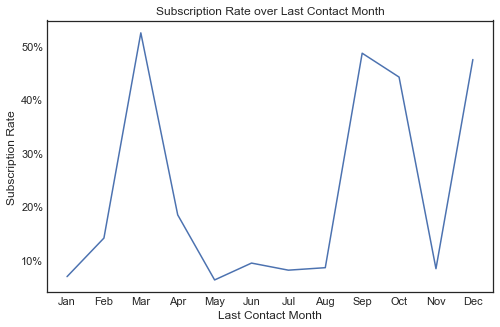

In [327]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'mth'
xlabel = 'Last Contact Month'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.lineplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(plt_data[xvar].astype(str),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

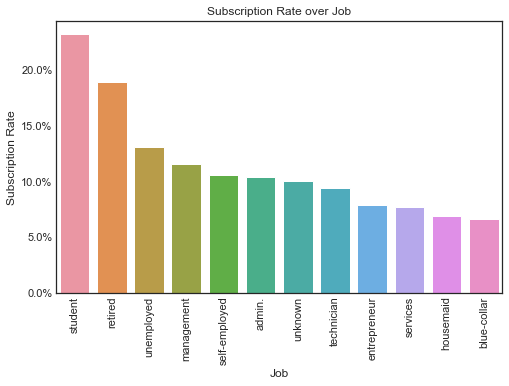

In [330]:
data = df1 
data['job_im1'] = np.where(data['job_im']=='Miss', 'unknown', data['job_im'])
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'job_im1'
xlabel = 'Job'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=yvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

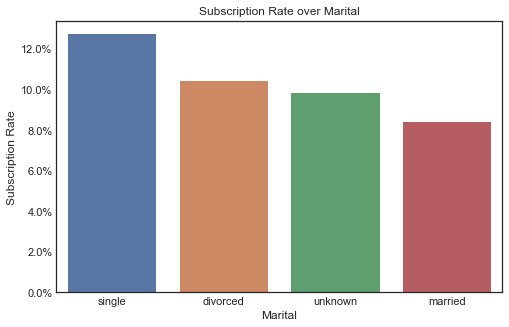

In [358]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'marital_im'
xlabel = 'Marital'
data[xvar + '1'] = np.where(data[xvar]=='Miss', 'unknown', data[xvar])

plt_data = data.groupby(xvar + '1')[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=yvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar + '1'].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

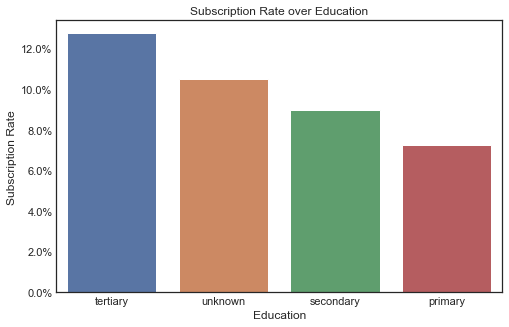

In [357]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'education'
xlabel = 'Education'
data[xvar + '1'] = np.where(data[xvar]=='Miss', 'unknown', data[xvar])

plt_data = data.groupby(xvar + '1')[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=yvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar + '1'].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

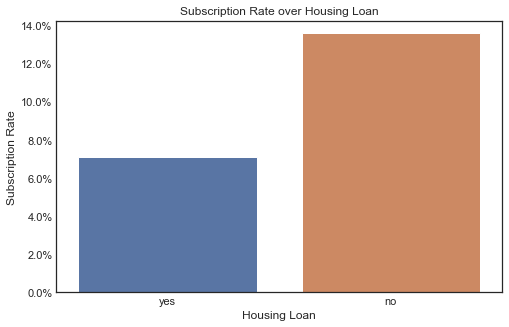

In [360]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'housing'
xlabel = 'Housing Loan'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

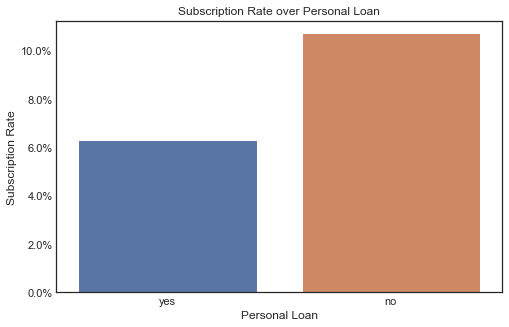

In [361]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'loan'
xlabel = 'Personal Loan'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

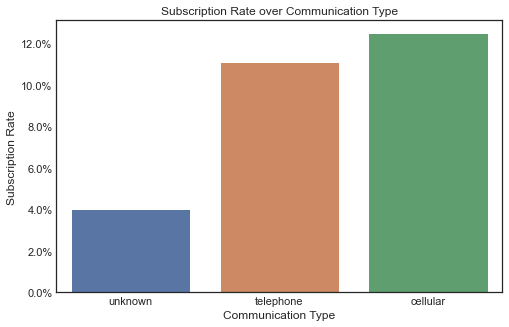

In [384]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'contact'
xlabel = 'Communication Type'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

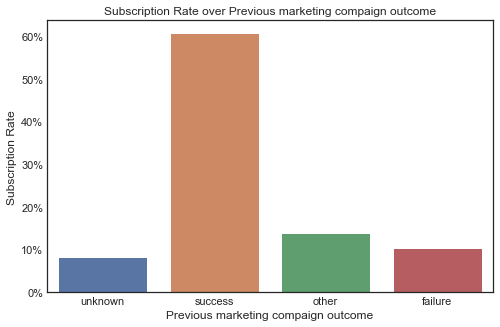

In [405]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'poutcome'
xlabel = 'Previous marketing compaign outcome'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

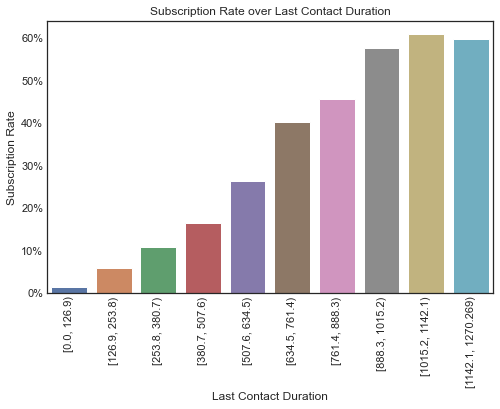

In [388]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'duration_im'
xlabel = 'Last Contact Duration'
data[xvar+'_bin'] = pd.cut(data[xvar].astype(int), bins = 10, right=False)

plt_data = data.groupby(xvar+'_bin')[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar+'_bin', inplace=True, ascending =True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar+'_bin'].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

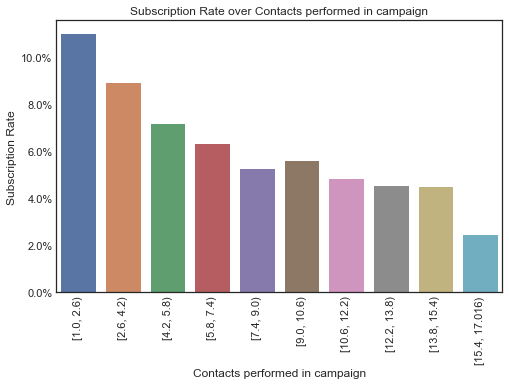

In [389]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'campaign_im'
xlabel = 'Contacts performed in campaign'
data[xvar+'_bin'] = pd.cut(data[xvar].astype(int), bins = 10, right=False)

plt_data = data.groupby(xvar+'_bin')[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar+'_bin', inplace=True, ascending =True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar+'_bin'].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

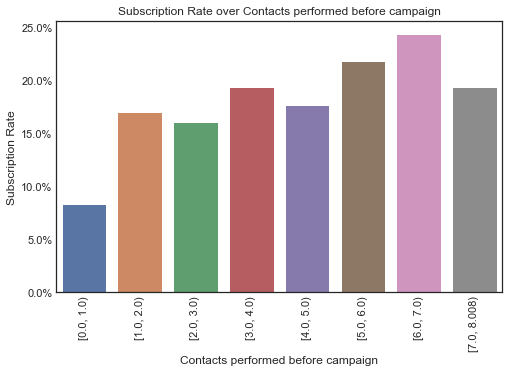

In [407]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'previous_im'
xlabel = 'Contacts performed before campaign'
data[xvar+'_bin'] = pd.cut(data[xvar].astype(int), bins = 8, right=False)

plt_data = data.groupby(xvar+'_bin')[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar+'_bin', inplace=True, ascending =True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar+'_bin'].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

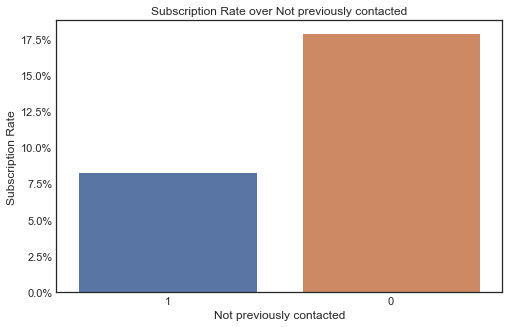

In [390]:
data = df1 
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'pdays_neg_1'
xlabel = 'Not previously contacted'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

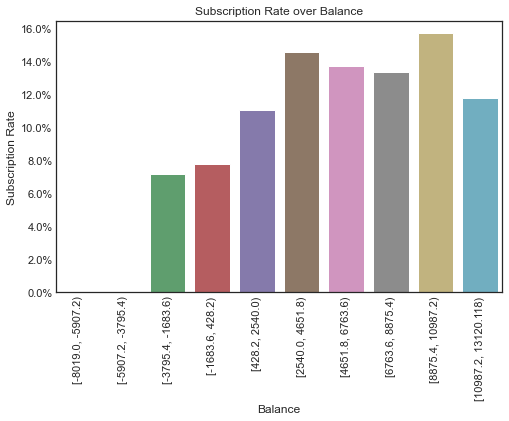

In [379]:
data = df1 
df1['balance_im_bin'] = pd.cut(df1.balance_im.astype(int), bins = 10, right=False)
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'balance_im_bin'
xlabel = 'Balance'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

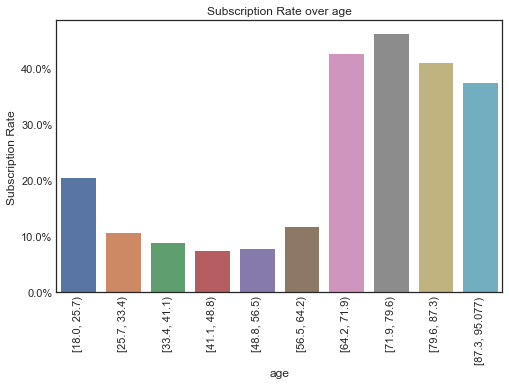

In [381]:
data = df1 
df1['age_im_bin'] = pd.cut(df1.age_im.astype(int), bins = 10, right=False)
yvar = 'y_n' 
ylabel = 'Subscription Rate'
xvar = 'age_im_bin'
xlabel = 'age'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =True)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

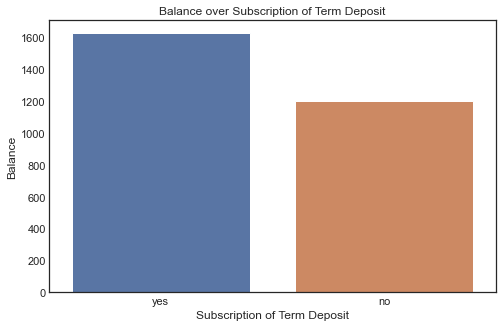

In [353]:
data = df1 
yvar = 'balance_im'
ylabel = 'Balance'
xvar = 'y' 
xlabel = 'Subscription of Term Deposit'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

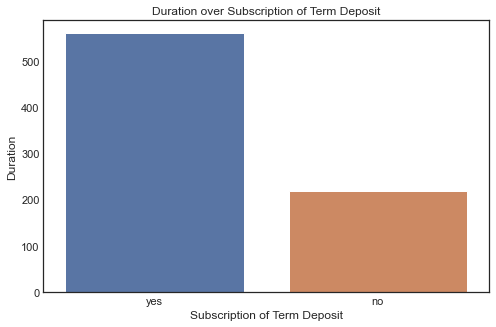

In [354]:
data = df1 
yvar = 'duration_im'
ylabel = 'Duration'
xvar = 'y' 
xlabel = 'Subscription of Term Deposit'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

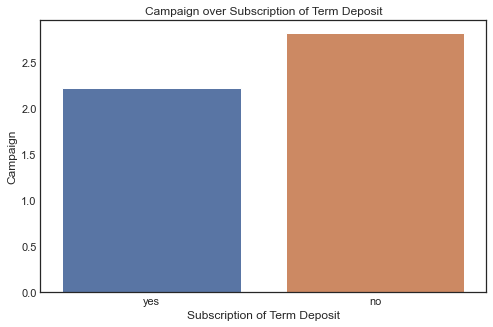

In [355]:
data = df1 
yvar = 'campaign_im'
ylabel = 'Campaign'
xvar = 'y' 
xlabel = 'Subscription of Term Deposit'

plt_data = data.groupby(xvar)[yvar].mean()
plt_data = pd.DataFrame(plt_data)
plt_data.reset_index(inplace=True)
plt_data.sort_values(by=xvar, inplace=True, ascending =False)

plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
sns.barplot(plt_data[xvar].astype(str), plt_data[yvar])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xticks(rotation = 90)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title(ylabel + ' over '+xlabel)
#plt.legend(loc="lower left")
plt.show()

## Dependent variable and sampling  

The data are imbalanced, and y=1 is about 9.86% and y=0 is about 0.90%. Hence, we consider two approachs   

- constructing individual-level sample weight, and       
- down-sampling the majority class randomly.   
- Synthetic Minority Over-sampling Technique (SMOTE)         

The randomly down-sampling and SMOTE change the demographic distribution of the sample, but as the variables will capture the variation, the new sample should be appropriate. 

### Individual-level sample weight

In [7]:
df1['y_n'].value_counts() / df1['y_n'].count()

0    0.901406
1    0.098594
Name: y_n, dtype: float64

Hence, the weights are 
- If y=1, wt = 0.9014     
- Else, wt = 0.0986

In [9]:
df1['wt'] = np.where(df1['y_n']==1, 0.9014, 0.0986)

### Downsampling the majority class, i.e. y=0 

As the number of observations for Class 0 and 1 are **38,399** and **4,200**, respectively, we down-sample the sample of Class 0 to **4,200**. 

In [11]:
import random
from scipy.stats import ttest_ind

In [12]:
random.seed(123)
n = 4200
sample_id = random.sample(range(0,len(df1[df1['y_n']==0])), n)
df2 = df1[df1['y_n']==0].iloc[sample_id]
small_df = pd.concat([df1[df1['y_n']==1], df2])

In [14]:
x_var_list=['age_im', 'balance_im', 'q1_flag', 'q2_flag', 'q3_flag', 'duration_im', 'campaign_im', 
            'pdays_im', 'pdays_neg_1', 'previous_im', 'default_n', 'housing_n', 'loan_im_n', 'loan_miss',   
            'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work', 
            'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 
            'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']
sample_comp(df1, small_df, x_var_list)

,Variable,Small Sample,Full Sample,t-test p-value
0,age_im,40.617268,40.697738,0.503
1,balance_im,1243.999440,1415.174938,0.000
2,q1_flag,0.096669,0.114048,0.000
3,q2_flag,0.502993,0.477024,0.000
4,q3_flag,0.299538,0.291548,0.143
5,duration_im,252.744009,388.909333,0.000
6,campaign_im,2.754149,2.527619,0.000
7,pdays_im,35.719125,43.134167,0.000
8,pdays_neg_1,0.839832,0.782619,0.000
9,previous_im,0.445316,0.630833,0.000


### SMOTE  

Synthetic Minority Over-sampling Technique (SMOTE) is a popular technique to over-sample when maintain the representativeness of the new sample.

In [3]:
import imblearn

In [395]:
x_var_list=['age_im', 'balance_im', 'q1_flag', 'q2_flag', 'q3_flag', 'duration_im', 'campaign_im', 
            'pdays_im', 'pdays_neg_1', 'previous_im', 'default_n', 'housing_n', 'loan_im_n', 'loan_miss',   
            'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work', 
            'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 
            'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']

sm = imblearn.over_sampling.SMOTE(random_state=123)
new_df, y_res = sm.fit_resample(df1[x_var_list], df1['y_n'])
new_df['y_n'] = y_res

In [396]:
summary_stat(new_df,x_var_list+['y_n'])

,Variable,N,# Miss,% Miss,Mean,STD,Min,5%,25%,50%,75%,95%,Max
0,age_im,76798,0,0.00%,40.6,10.0,18.0,27.0,33.000000,39.000000,47.000000,58.720670,95.00
1,balance_im,76798,0,0.00%,1414.5,2323.5,-8019.0,-98.0,115.000000,535.000000,1672.766905,6101.511597,13099.16
2,q1_flag,76798,0,0.00%,0.1,0.3,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.00
3,q2_flag,76798,0,0.00%,0.4,0.5,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.00
4,q3_flag,76798,0,0.00%,0.2,0.4,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.00
5,duration_im,76798,0,0.00%,389.3,326.7,0.0,54.0,145.110866,269.122839,554.561333,1136.485406,1269.04
6,campaign_im,76798,0,0.00%,2.5,2.3,1.0,1.0,1.000000,2.000000,3.000000,6.702755,17.00
7,pdays_im,76798,0,0.00%,42.3,95.7,-1.0,-1.0,-1.000000,-1.000000,-1.000000,315.000000,367.00
8,pdays_neg_1,76798,0,0.00%,0.8,0.4,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.00
9,previous_im,76798,0,0.00%,0.6,1.5,0.0,0.0,0.000000,0.000000,0.000000,4.000000,8.00


In [397]:
sample_comp(df1, new_df, x_var_list)

,Variable,Small Sample,Full Sample,t-test p-value
0,age_im,40.617268,40.625401,0.892
1,balance_im,1243.999440,1414.508144,0.000
2,q1_flag,0.096669,0.067840,0.000
3,q2_flag,0.502993,0.367054,0.000
4,q3_flag,0.299538,0.204341,0.000
5,duration_im,252.744009,389.280221,0.000
6,campaign_im,2.754149,2.521550,0.000
7,pdays_im,35.719125,42.325641,0.000
8,pdays_neg_1,0.839832,0.773731,0.000
9,previous_im,0.445316,0.611891,0.000


## Variable selection 

Use sample generated with SMOTE



In [398]:
# new_df.to_csv('data_set_smote.csv')
# new_df = pd.read_csv('data_set_smote.csv')

### Random Forest & Gradient Boosting variable importance

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [399]:
y = new_df['y_n']
X = new_df[x_var_list]

In [400]:
rfm = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfm.fit(X, y)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [401]:
gbm = GradientBoostingClassifier(random_state = 42)
gbm.fit(X, y)

GradientBoostingClassifier(random_state=42)

<AxesSubplot:>

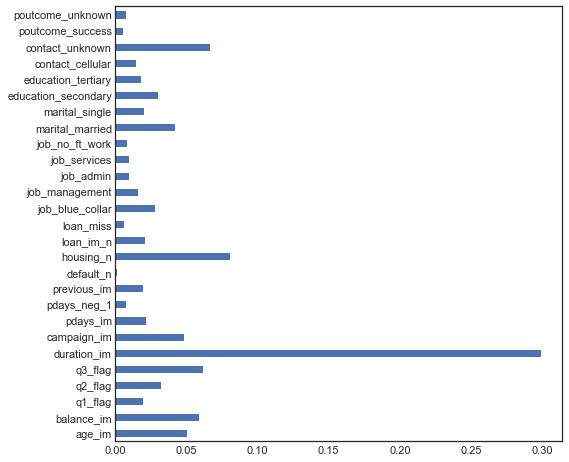

In [ ]:
plt.figure(figsize=(8, 8))
(pd.Series(rfm.feature_importances_, index=X.columns)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

<AxesSubplot:>

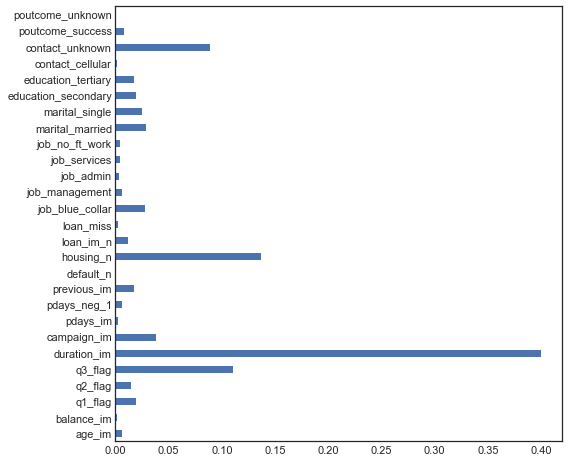

In [410]:
plt.figure(figsize=(8, 8))
(pd.Series(gbm.feature_importances_, index=X.columns)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

In [411]:
rf=pd.DataFrame({'features':X.columns,
                 'RF':rfm.feature_importances_})
gb=pd.DataFrame({'features':X.columns,
                 'GB':gbm.feature_importances_})
feature_importance = pd.merge(rf,gb,on='features')
feature_importance

,features,RF,GB
0,age_im,0.050561,0.005953
1,balance_im,0.058844,0.001021
2,q1_flag,0.019217,0.019213
3,q2_flag,0.032234,0.014414
4,q3_flag,0.061629,0.110555
5,duration_im,0.299078,0.399458
6,campaign_im,0.048537,0.037661
7,pdays_im,0.021820,0.001952
8,pdays_neg_1,0.007334,0.006416
9,previous_im,0.019241,0.017376


### LASSO Regression

In [412]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [413]:
y = new_df['y_n']
X = new_df[x_var_list]

In [414]:
lasso_model=Lasso(alpha=0.05)
lassoreg=lasso_model.fit(sm.add_constant(X), y)
lasso_res = pd.DataFrame({'variable': lassoreg.feature_names_in_, 
                          'Coeff': lassoreg.coef_})
lasso_res

,variable,Coeff
0,const,0.000000
1,age_im,-0.000075
2,balance_im,0.000015
3,q1_flag,-0.000000
4,q2_flag,-0.000000
5,q3_flag,-0.000000
6,duration_im,0.000789
7,campaign_im,-0.010938
8,pdays_im,0.000524
9,pdays_neg_1,-0.000000


In [415]:
lasso_res[lasso_res['Coeff'].abs()>0.0001]

,variable,Coeff
6,duration_im,0.000789
7,campaign_im,-0.010938
8,pdays_im,0.000524
10,previous_im,0.010554
12,housing_n,-0.144444


### Correlation Coefficient Matrix

In [416]:
def corr_table(data, yvar, Xvar):
    corr_coeff_table = []
    for i in Xvar:
        corr_coeff_table.append([i, round(np.corrcoef(data[yvar],data[i])[0,1],4)])
    corr_coeff_table = pd.DataFrame(corr_coeff_table)
    corr_coeff_table.columns = ['features', 'correlation coefficient']
    return pd.DataFrame(corr_coeff_table) 

In [417]:
cor_table = corr_table(new_df, 'y_n', x_var_list)
cor_table['abs_corr'] = cor_table['correlation coefficient'].abs()
cor_table.sort_values(by='abs_corr', ascending=False)

,features,correlation coefficient,abs_corr
5,duration_im,0.5205,0.5205
11,housing_n,-0.3750,0.3750
24,contact_unknown,-0.3648,0.3648
19,marital_married,-0.3087,0.3087
3,q2_flag,-0.2965,0.2965
21,education_secondary,-0.2779,0.2779
14,job_blue_collar,-0.2775,0.2775
4,q3_flag,-0.2415,0.2415
12,loan_im_n,-0.2348,0.2348
8,pdays_neg_1,-0.1920,0.1920


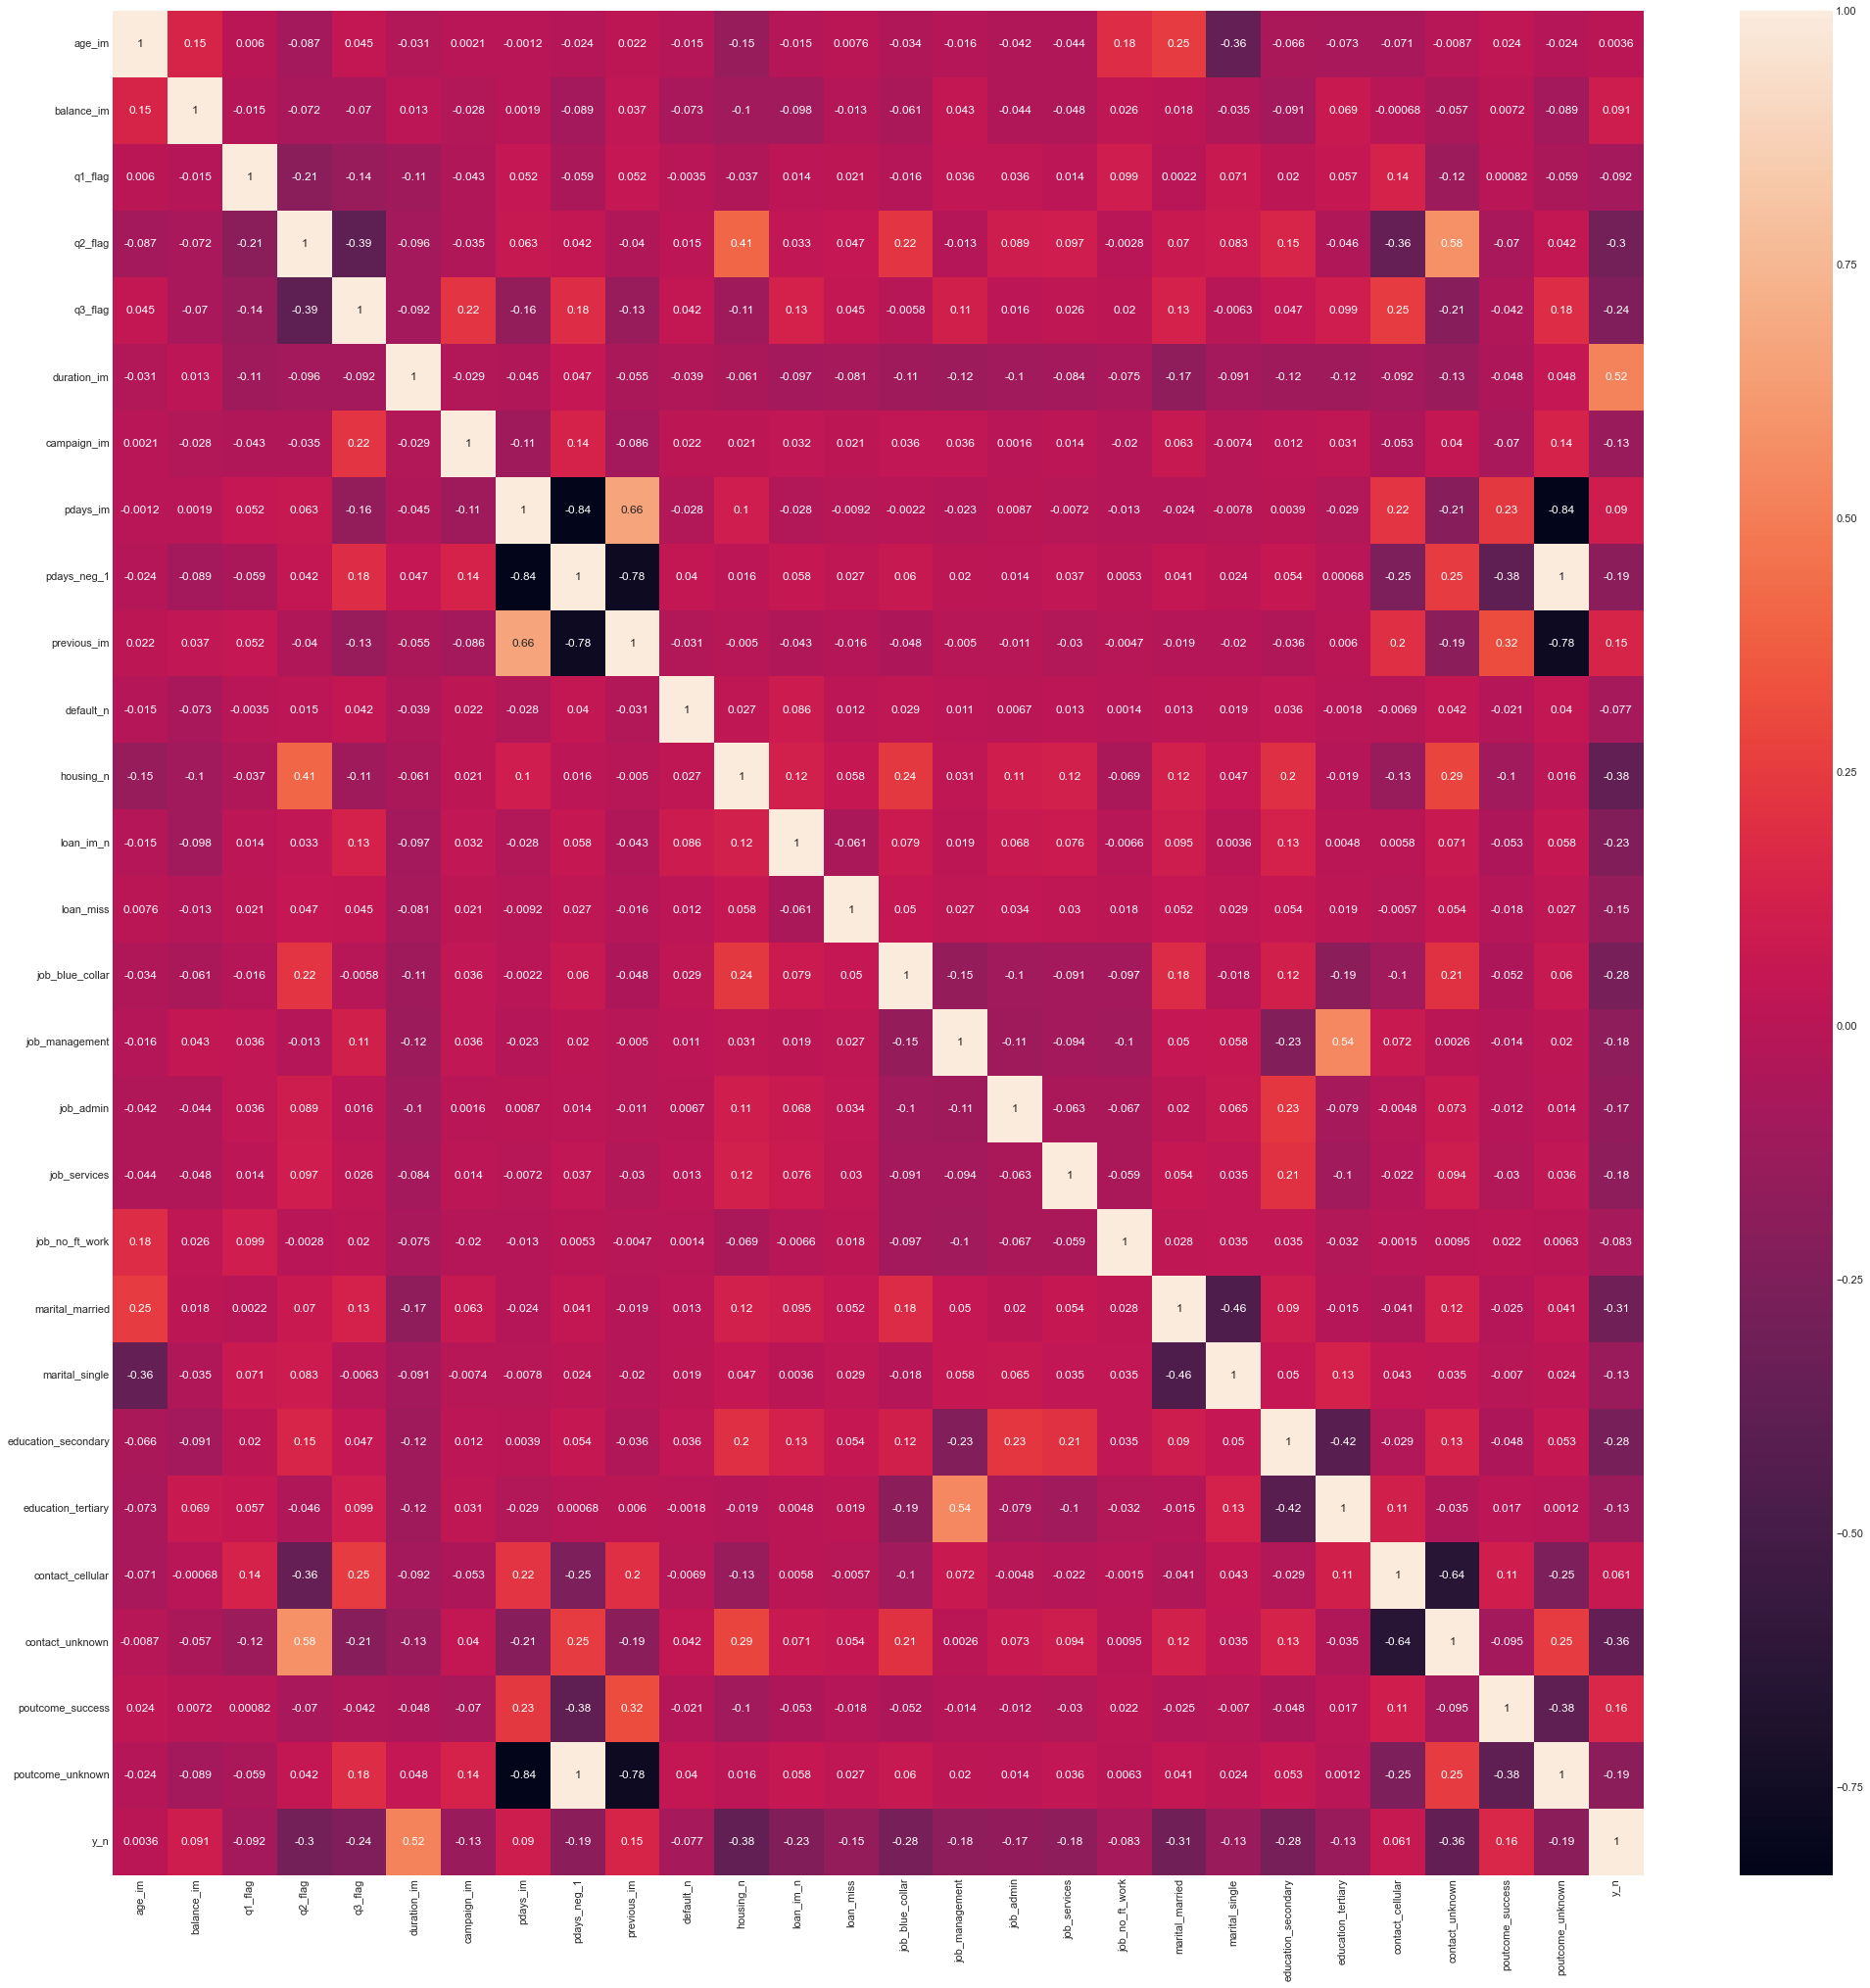

In [418]:
size = 35

cor_map = new_df.corr()

sns.heatmap(cor_map, annot = True)
sns.set(rc = {'figure.figsize':(size,size)})
plt.show() 

A list of highly correlated variables: 

- pdays_im, pdays_neg_1, previous_im (0.84 or 0.78)    
- poutcome_unknown, pdays_im (0.84) and previous_im (0.78)
- contact_unknown, contact_cellular (0.64)       
- contact_unknown, q2_flag (0.58)         
- marital_single, marital_married (0.46)     
- education_tertiary, education_secondary (0.42) 
- housing_n, q2_flag (0.41) 
- poutcome_success, pdays_neg_1 (0.38)
- q3_flag, q2_flag (maybe q1_flag) (0.36)   
- age_im, marrital_single (0.36)     
- q2_flag, contact_cellular (0.36)

In [419]:
cor_map.to_csv('corr_map.csv')

### Summary

In [420]:
rf_candidate_20 = feature_importance.sort_values(by='RF',ascending=False).head(20)['features']
gb_candidate_20 = feature_importance.sort_values(by='GB',ascending=False).head(20)['features']
co_candidate_20 = cor_table.sort_values(by='abs_corr', ascending=False).head(20)['features']
summary_table = pd.DataFrame({'Rank': [i for i in range(1,21)], 
                              'RF': rf_candidate_20.tolist(), 
                              'GB': gb_candidate_20.tolist(), 
                              'Corr Coeff': co_candidate_20.tolist()})
summary_table

,Rank,RF,GB,Corr Coeff
0,1,duration_im,duration_im,duration_im
1,2,housing_n,housing_n,housing_n
2,3,contact_unknown,q3_flag,contact_unknown
3,4,q3_flag,contact_unknown,marital_married
4,5,balance_im,campaign_im,q2_flag
5,6,age_im,marital_married,education_secondary
6,7,campaign_im,job_blue_collar,job_blue_collar
7,8,marital_married,marital_single,q3_flag
8,9,q2_flag,education_secondary,loan_im_n
9,10,education_secondary,q1_flag,pdays_neg_1


Based on the correlation between variables, we consider several small candidate variable lists that exclude some variables high correlated with others, besides the full candidate variable list. 

Variable selection rationle for small candidate variable list: 

- Among pdays_im, pdays_neg_1, previous_im (0.84 or 0.78), prefer to only keep **pdays_neg_1**. pdays_neg_1=1 for about 84% of sample, which denotes "whether client was not previously contacted".   

- **contact_unknown** is more correlated with y than contact_cellular. It indicates whether we know the contact channel or not. 

- Time flags, i.e. **q1_flag**, q2_flag and **q3_flag**, were meant to capture seasonality. Even though q2_flag is more correlated with the dependent variable than other two flags, it is more related with a group of other variables. Drop it will reduce multicolinear between variables without the need to drop other variables that correlated with q2_flag.    

- For marital status, **marital_married** is slightly more related with y, so marital_single will be dropped.       

- For education, **education_secondary** is more related, so education_tertiary will dropped.   

- For poutcome variables, higher correlated with pdays_im, pdays_neg_1, previous_im, and NOT good correlation with dependent variable. So drop both poutcome_unknown and poutcome_success.


In [421]:
x_var_list_s = ['age_im', 'balance_im', 'q1_flag', 'q3_flag', 'duration_im', 'campaign_im', 'pdays_neg_1',
                'default_n', 'housing_n', 'loan_im_n', 'loan_miss', 
                'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work',
                'marital_married', 'education_secondary', 'contact_unknown']

## Model fit   

In model development step, as the purpose is to find model with best prediction performance, I adopt the following approaches:    
      
- Logistic Regression   
- Random Forest         
- Gradient Boosting            

I use SMOTE sample. 

### Random sample split 

In [17]:
from sklearn.model_selection import train_test_split

In [422]:
# Full variable list
# SMOTE Sample
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(new_df[x_var_list], new_df['y_n'], test_size=0.3, random_state=123)
# Full Sample
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(df1[x_var_list], df1['y_n'], test_size=0.3, random_state=123)

# Small variable list
# SMOTE Sample
X_smote_s_train, X_smote_s_test, y_smote_s_train, y_smote_s_test = train_test_split(new_df[x_var_list_s], new_df['y_n'], test_size=0.3, random_state=123)
# Full Sample
X_full_s_train, X_full_s_test, y_full_s_train, y_full_s_test = train_test_split(df1[x_var_list_s], df1['y_n'], test_size=0.3, random_state=123)

### Logistic Regression

#### Initial Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [424]:
log_smote_small=sm.Logit(y_smote_s_train,sm.add_constant(X_smote_s_train)).fit()
print(log_smote_small.summary2())

Optimization terminated successfully.
         Current function value: 0.253600
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.634     
Dependent Variable:  y_n               AIC:               27306.0547
Date:                2022-04-29 00:30  BIC:               27483.8996
No. Observations:    53758             Log-Likelihood:    -13633.   
Df Model:            19                LL-Null:           -37262.   
Df Residuals:        53738             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                1.7873   0.0789  22.6591 0.0000  1.6327  1.9419
age_im               0.0076 

In [124]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_smote_s_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_smote_s_train.values, i)
                   for i in range(len(X_smote_s_train.columns))]
vif_data

,feature,VIF
0,age_im,7.395758
1,balance_im,1.445324
2,q1_flag,1.169355
3,q3_flag,1.670984
4,duration_im,2.584086
5,campaign_im,2.292451
6,pdays_neg_1,4.664957
7,default_n,1.026927
8,housing_n,2.021675
9,loan_im_n,1.190687


##### Backward selection  

Drop the least significant variable: **balance_im**

In [153]:
x_var_list = X_smote_s_train.columns.tolist()
x_var_list.remove('balance_im')

In [154]:
log_smote_small=sm.Logit(y_smote_s_train,sm.add_constant(X_smote_s_train[x_var_list])).fit()
print(log_smote_small.summary2())

Optimization terminated successfully.
         Current function value: 0.253605
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.634     
Dependent Variable:  y_n               AIC:               27304.6011
Date:                2022-04-28 20:03  BIC:               27473.5538
No. Observations:    53758             Log-Likelihood:    -13633.   
Df Model:            18                LL-Null:           -37262.   
Df Residuals:        53739             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                1.7913   0.0787  22.7657 0.0000  1.6371  1.9455
age_im               0.0077 

In [145]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_smote_s_train[x_var_list].columns
vif_data["VIF"] = [variance_inflation_factor(X_smote_s_train[x_var_list].values, i)
                   for i in range(len(X_smote_s_train[x_var_list].columns))]
vif_data

,feature,VIF
0,q1_flag,1.152311
1,q3_flag,1.662294
2,duration_im,2.086929
3,campaign_im,2.186113
4,pdays_neg_1,3.963549
5,default_n,1.023694
6,housing_n,2.012096
7,loan_im_n,1.185667
8,loan_miss,1.061849
9,job_blue_collar,1.462974


##### Address multicolinearity 

Drop variable **age_im** that has a VIF of 6.752487.

In [141]:
x_var_list = X_smote_s_train.columns.tolist()
x_var_list.remove('balance_im')
x_var_list.remove('age_im')

log_smote_small_final=sm.Logit(y_smote_s_train,sm.add_constant(X_smote_s_train[x_var_list])).fit()
print(log_smote_small_final.summary2())

Optimization terminated successfully.
         Current function value: 0.253828
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.634     
Dependent Variable:  y_n               AIC:               27326.5512
Date:                2022-04-28 20:01  BIC:               27486.6117
No. Observations:    53758             Log-Likelihood:    -13645.   
Df Model:            17                LL-Null:           -37262.   
Df Residuals:        53740             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                2.0989   0.0478  43.9292 0.0000  2.0052  2.1925
q1_flag             -1.3155 

In [142]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_smote_s_train[x_var_list].columns
vif_data["VIF"] = [variance_inflation_factor(X_smote_s_train[x_var_list].values, i)
                   for i in range(len(X_smote_s_train[x_var_list].columns))]
vif_data

,feature,VIF
0,q1_flag,1.152311
1,q3_flag,1.662294
2,duration_im,2.086929
3,campaign_im,2.186113
4,pdays_neg_1,3.963549
5,default_n,1.023694
6,housing_n,2.012096
7,loan_im_n,1.185667
8,loan_miss,1.061849
9,job_blue_collar,1.462974


#### Model performance evaluation 

Final variable list: 

'q1_flag', 'q3_flag', 'duration_im', 'campaign_im', 'pdays_neg_1', 'default_n', 'housing_n',              
'loan_im_n', 'loan_miss', 'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work',              
'marital_married', 'education_secondary', 'contact_unknown'

In [158]:
final_x_list = ['q1_flag', 'q3_flag', 'duration_im', 'campaign_im', 'pdays_neg_1', 'default_n', 'housing_n',
                'loan_im_n', 'loan_miss', 'job_blue_collar', 'job_management', 'job_admin', 'job_services',
                'job_no_ft_work', 'marital_married', 'education_secondary', 'contact_unknown']

In [160]:
y_pred_log=log_smote_small_final.predict(sm.add_constant(X_smote_s_test[x_var_list]))
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_smote_s_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_smote_s_test, y_pred_log_b))

Accuracy: 0.9041232638888889
F1 Score: 0.904968810496881


#### Alternative models

##### Modeling with full candidate variable list

In [125]:
log_smote_full=sm.Logit(y_smote_train,sm.add_constant(X_smote_train)).fit()
print(log_smote_full.summary2())

Optimization terminated successfully.
         Current function value: 0.226267
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.674     
Dependent Variable:  y_n               AIC:               24379.3710
Date:                2022-04-28 19:52  BIC:               24610.5694
No. Observations:    53758             Log-Likelihood:    -12164.   
Df Model:            25                LL-Null:           -37262.   
Df Residuals:        53732             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                5.5946   0.1427  39.2143 0.0000  5.3150  5.8743
age_im              -0.0220 

In [126]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_smote_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_smote_train.values, i)
                   for i in range(len(X_smote_train.columns))]
vif_data

,feature,VIF
0,age_im,13.946592
1,balance_im,1.468573
2,q1_flag,1.311939
3,q2_flag,3.452014
4,q3_flag,2.037212
5,duration_im,2.702700
6,campaign_im,2.333675
7,pdays_im,3.644422
8,pdays_neg_1,14.229057
9,previous_im,2.617902


##### Modeling with original data

In [121]:
log_orig_full=sm.Logit(y_full_train,sm.add_constant(X_full_train)).fit()
print(log_orig_full.summary2())

Optimization terminated successfully.
         Current function value: 0.226716
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.302     
Dependent Variable:  y_n               AIC:               13572.8986
Date:                2022-04-28 19:49  BIC:               13788.7741
No. Observations:    29819             Log-Likelihood:    -6760.4   
Df Model:            25                LL-Null:           -9685.1   
Df Residuals:        29793             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -1.9893   0.2277  -8.7347 0.0000 -2.4356 -1.5429
age_im               0.0011 

In [122]:
log_orig_small=sm.Logit(y_full_s_train,sm.add_constant(X_full_s_train)).fit()
print(log_orig_small.summary2())

Optimization terminated successfully.
         Current function value: 0.229619
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.293     
Dependent Variable:  y_n               AIC:               13734.0078
Date:                2022-04-28 19:50  BIC:               13900.0659
No. Observations:    29819             Log-Likelihood:    -6847.0   
Df Model:            19                LL-Null:           -9685.1   
Df Residuals:        29799             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -1.7665   0.1212 -14.5766 0.0000 -2.0040 -1.5289
age_im              -0.0043 

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def rf_train(X_train, X_test, y_train, y_test, 
             threshold = 0.02, max_iter = 10,
             n_estimators = 1000, random_state = 42, max_features = 0.7):
    
    acc = []
    f1s = []
    diff = 1
    ct = 1
    xvar = X_train.columns.tolist()
    
    for i in range(max_iter):
        print('-------------------------------------------')
        print('Iteration '+str(ct))
        ct += 1
        model = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state, max_features = max_features)
        model.fit(X_train[xvar], y_train)
        train_acc = metrics.accuracy_score(y_train, model.predict(X_train[xvar]))
        test_acc  = metrics.accuracy_score(y_test, model.predict(X_test[xvar]))
        diff = train_acc - test_acc
        acc.append([train_acc, test_acc])
        print("Training Accuracy: " + str(round(train_acc,4)) + "; Testing Accuracy: " + str(round(test_acc,4)))         
        train_f1 = metrics.f1_score(y_train, model.predict(X_train[xvar]))
        test_f1  = metrics.f1_score(y_test, model.predict(X_test[xvar]))
        f1s.append([train_f1, test_f1])        
        
        if abs(diff) < threshold:
            break    
            
        var_drop = model.feature_names_in_[model.feature_importances_.tolist().index(min(model.feature_importances_))]
        xvar.remove(var_drop)   
        print('Drop variable: '+var_drop)
        
    acc = pd.DataFrame(acc)
    acc.columns = ['Training Accuracy', 'Testing Accuracy']
    acc['iteration'] = [i for i in range(1,len(acc)+1)]
    f1s = pd.DataFrame(f1s)
    f1s.columns = ['Training Accuracy', 'Testing Accuracy']
    f1s['iteration'] = [i for i in range(1,len(f1s)+1)]

    return xvar, acc, f1s

#### Full candidate variable, SMOTE sample

In [56]:
xvar_smote, acc_smote, f1s_smote = rf_train(X_smote_train, X_smote_test, y_smote_train, y_smote_test, 
                                            threshold = 0.02, max_iter = 20,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 1.0; Testing Accuracy: 0.9414
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 1.0; Testing Accuracy: 0.9414
Drop variable: loan_miss
-------------------------------------------
Iteration 3
Training Accuracy: 1.0; Testing Accuracy: 0.9414
Drop variable: job_admin
-------------------------------------------
Iteration 4
Training Accuracy: 1.0; Testing Accuracy: 0.9409
Drop variable: job_services
-------------------------------------------
Iteration 5
Training Accuracy: 1.0; Testing Accuracy: 0.9416
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 6
Training Accuracy: 1.0; Testing Accuracy: 0.9402
Drop variable: job_management
-------------------------------------------
Iteration 7
Training Accuracy: 1.0; Testing Accuracy: 0.9402
Drop variable: pdays_neg_1
-------------------------------------------
Iteration 8
Training Accuracy: 

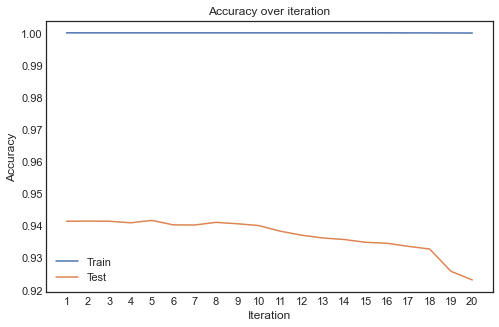

In [57]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_smote['iteration'], acc_smote['Training Accuracy'],label='Train')
plt.plot(acc_smote['iteration'], acc_smote['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_smote['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

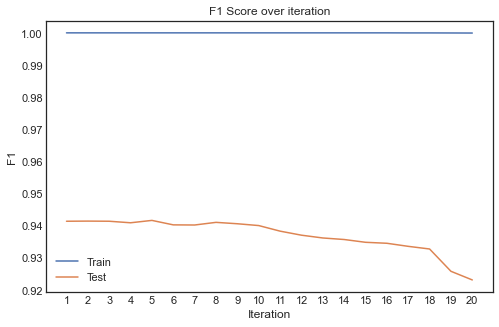

In [58]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_smote['iteration'], acc_smote['Training Accuracy'],label='Train')
plt.plot(acc_smote['iteration'], acc_smote['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(acc_smote['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

#### Full candidate variable, original sample

In [59]:
xvar_full, acc_full, f1s_full = rf_train(X_full_train, X_full_test, y_full_train, y_full_test, 
                                            threshold = 0.02, max_iter = 20,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 1.0; Testing Accuracy: 0.9147
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 1.0; Testing Accuracy: 0.9138
Drop variable: pdays_neg_1
-------------------------------------------
Iteration 3
Training Accuracy: 1.0; Testing Accuracy: 0.9145
Drop variable: loan_miss
-------------------------------------------
Iteration 4
Training Accuracy: 1.0; Testing Accuracy: 0.9146
Drop variable: job_services
-------------------------------------------
Iteration 5
Training Accuracy: 1.0; Testing Accuracy: 0.9146
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 6
Training Accuracy: 1.0; Testing Accuracy: 0.9149
Drop variable: q1_flag
-------------------------------------------
Iteration 7
Training Accuracy: 1.0; Testing Accuracy: 0.9139
Drop variable: job_admin
-------------------------------------------
Iteration 8
Training Accuracy: 1.0; Te

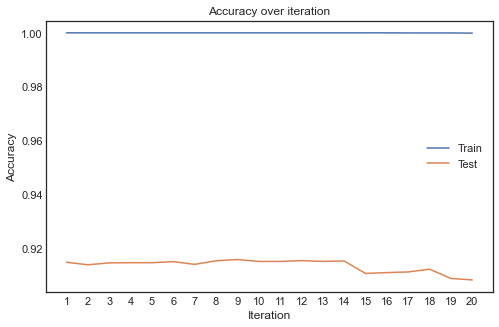

In [60]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full['iteration'], acc_full['Training Accuracy'],label='Train')
plt.plot(acc_full['iteration'], acc_full['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_full['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

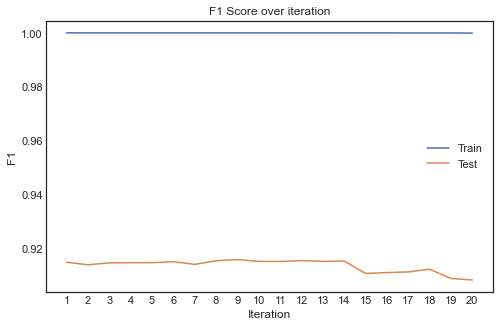

In [61]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full['iteration'], acc_full['Training Accuracy'],label='Train')
plt.plot(acc_full['iteration'], acc_full['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(acc_full['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

#### Small candidate variable, SMOTE sample

In [63]:
xvar_smote_s, acc_smote_s, f1s_smote_s = rf_train(X_smote_s_train, X_smote_s_test, y_smote_s_train, y_smote_s_test, 
                                            threshold = 0.02, max_iter = 15,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 1.0; Testing Accuracy: 0.9377
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 1.0; Testing Accuracy: 0.9379
Drop variable: loan_miss
-------------------------------------------
Iteration 3
Training Accuracy: 1.0; Testing Accuracy: 0.9375
Drop variable: job_admin
-------------------------------------------
Iteration 4
Training Accuracy: 1.0; Testing Accuracy: 0.9367
Drop variable: job_services
-------------------------------------------
Iteration 5
Training Accuracy: 1.0; Testing Accuracy: 0.937
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 6
Training Accuracy: 1.0; Testing Accuracy: 0.9357
Drop variable: loan_im_n
-------------------------------------------
Iteration 7
Training Accuracy: 1.0; Testing Accuracy: 0.9345
Drop variable: job_management
-------------------------------------------
Iteration 8
Training Accuracy: 1.0

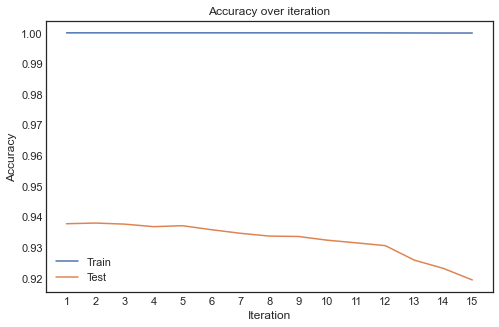

In [64]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_smote_s['iteration'], acc_smote_s['Training Accuracy'],label='Train')
plt.plot(acc_smote_s['iteration'], acc_smote_s['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_smote_s['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

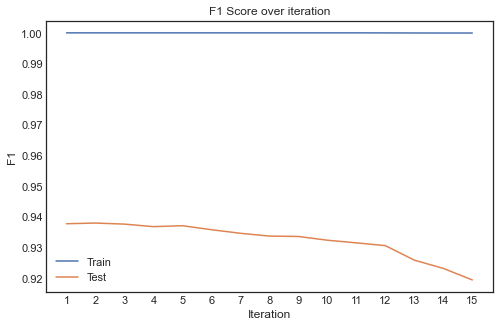

In [65]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_smote_s['iteration'], acc_smote_s['Training Accuracy'],label='Train')
plt.plot(acc_smote_s['iteration'], acc_smote_s['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(acc_smote_s['iteration'])
plt.legend()
plt.title('F1 Score over iteration')
plt.show()

#### Small candidate variable, original sample

In [66]:
xvar_full_s, acc_full_s, f1s_full_s = rf_train(X_full_s_train, X_full_s_test, y_full_s_train, y_full_s_test, 
                                            threshold = 0.02, max_iter = 15,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 1.0; Testing Accuracy: 0.9125
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 1.0; Testing Accuracy: 0.9121
Drop variable: loan_miss
-------------------------------------------
Iteration 3
Training Accuracy: 1.0; Testing Accuracy: 0.9122
Drop variable: job_services
-------------------------------------------
Iteration 4
Training Accuracy: 1.0; Testing Accuracy: 0.9121
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 5
Training Accuracy: 1.0; Testing Accuracy: 0.9131
Drop variable: job_admin
-------------------------------------------
Iteration 6
Training Accuracy: 1.0; Testing Accuracy: 0.9121
Drop variable: loan_im_n
-------------------------------------------
Iteration 7
Training Accuracy: 1.0; Testing Accuracy: 0.912
Drop variable: q1_flag
-------------------------------------------
Iteration 8
Training Accuracy: 1.0; Testi

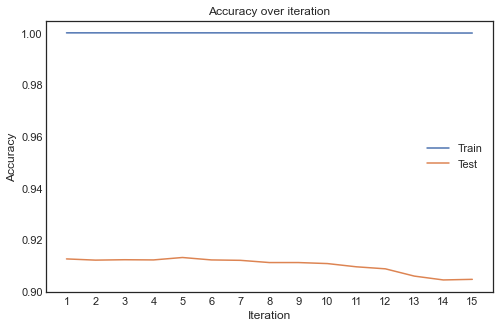

In [67]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_s['iteration'], acc_full_s['Training Accuracy'],label='Train')
plt.plot(acc_full_s['iteration'], acc_full_s['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_full_s['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

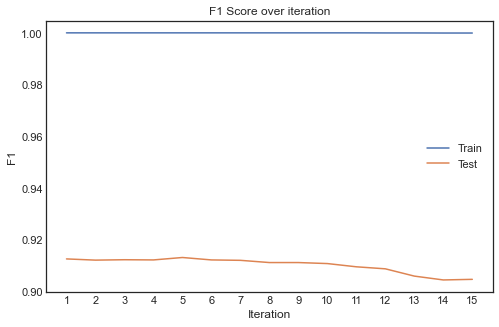

In [68]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_s['iteration'], acc_full_s['Training Accuracy'],label='Train')
plt.plot(acc_full_s['iteration'], acc_full_s['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(acc_full_s['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

### Gradient Boosting

In [425]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

def gb_train(X_train, X_test, y_train, y_test, 
             threshold = 0.02, max_iter = 10, learning_rate=0.1,
             n_estimators = 1000, random_state = 42, max_features = 0.7):
    
    acc = []
    f1s = []
    diff = 1
    ct = 1
    xvar = X_train.columns.tolist()
    
    for i in range(max_iter):
        print('-------------------------------------------')
        print('Iteration '+str(ct))
        ct += 1
        model = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate=learning_rate, random_state = random_state, max_features = max_features)
        model.fit(X_train[xvar], y_train)
        train_acc = metrics.accuracy_score(y_train, model.predict(X_train[xvar]))
        test_acc  = metrics.accuracy_score(y_test, model.predict(X_test[xvar]))
        diff = train_acc - test_acc
        acc.append([train_acc, test_acc])
        print("Training Accuracy: " + str(round(train_acc,4)) + "; Testing Accuracy: " + str(round(test_acc,4)))         
        train_f1 = metrics.f1_score(y_train, model.predict(X_train[xvar]))
        test_f1  = metrics.f1_score(y_test, model.predict(X_test[xvar]))
        f1s.append([train_f1, test_f1])        
        
        if abs(diff) < threshold:
            break    
            
        var_drop = model.feature_names_in_[model.feature_importances_.tolist().index(min(model.feature_importances_))]
        xvar.remove(var_drop)   
        print('Drop variable: '+var_drop)
        
    acc = pd.DataFrame(acc)
    acc.columns = ['Training Accuracy', 'Testing Accuracy']
    acc['iteration'] = [i for i in range(1,len(acc)+1)]
    f1s = pd.DataFrame(f1s)
    f1s.columns = ['Training Accuracy', 'Testing Accuracy']
    f1s['iteration'] = [i for i in range(1,len(f1s)+1)]

    return xvar, acc, f1s

#### Full candidate variable, SMOTE sample

In [426]:
xvar_smote_gb, acc_smote_gb, f1s_smote_gb = gb_train(X_smote_train, X_smote_test, y_smote_train, y_smote_test, 
                                            threshold = 0.01, max_iter = 20, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9506; Testing Accuracy: 0.9421


In [427]:
acc_smote_gb

,Training Accuracy,Testing Accuracy,iteration
0,0.950631,0.942057,1


In [428]:
f1s_smote_gb

,Training Accuracy,Testing Accuracy,iteration
0,0.950096,0.941898,1


#### Full candidate variable, original sample

In [86]:
xvar_full_gb, acc_full_gb, f1s_full_gb = gb_train(X_full_train, X_full_test, y_full_train, y_full_test, 
                                            threshold = 0.01, max_iter = 20, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9312; Testing Accuracy: 0.9149
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 0.9306; Testing Accuracy: 0.915
Drop variable: job_services
-------------------------------------------
Iteration 3
Training Accuracy: 0.9322; Testing Accuracy: 0.9162
Drop variable: education_secondary
-------------------------------------------
Iteration 4
Training Accuracy: 0.9306; Testing Accuracy: 0.9156
Drop variable: job_admin
-------------------------------------------
Iteration 5
Training Accuracy: 0.9305; Testing Accuracy: 0.9144
Drop variable: loan_miss
-------------------------------------------
Iteration 6
Training Accuracy: 0.9305; Testing Accuracy: 0.9156
Drop variable: job_blue_collar
-------------------------------------------
Iteration 7
Training Accuracy: 0.9308; Testing Accuracy: 0.9157
Drop variable: job_no_ft_work
-------------------------------------------
It

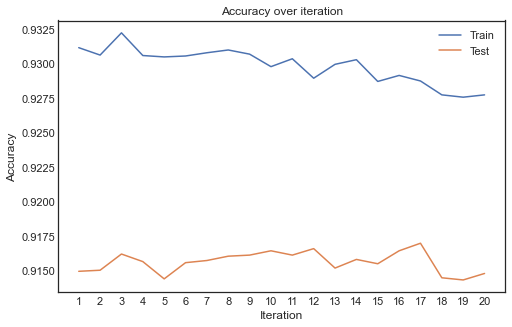

In [87]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_gb['iteration'], acc_full_gb['Training Accuracy'],label='Train')
plt.plot(acc_full_gb['iteration'], acc_full_gb['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_full_gb['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

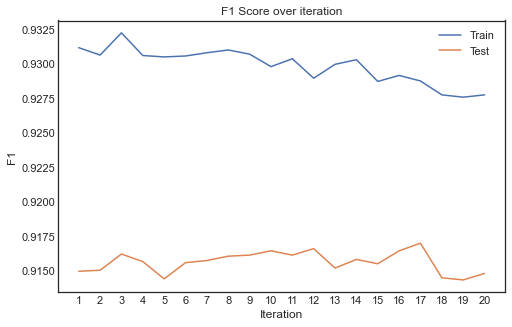

In [88]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_gb['iteration'], acc_full_gb['Training Accuracy'],label='Train')
plt.plot(acc_full_gb['iteration'], acc_full_gb['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(acc_full_gb['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

#### Small candidate variable, SMOTE sample

In [89]:
xvar_smote_s_gb, acc_smote_s_gb, f1s_smote_s_gb = gb_train(X_smote_s_train, X_smote_s_test, y_smote_s_train, y_smote_s_test, 
                                            threshold = 0.01, max_iter = 15, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9468; Testing Accuracy: 0.9413


In [168]:
acc_smote_s_gb

,Training Accuracy,Testing Accuracy,iteration
0,0.946817,0.941276,1


In [167]:
f1s_smote_s_gb

,Training Accuracy,Testing Accuracy,iteration
0,0.946397,0.941146,1


#### Small candidate variable, original sample

In [92]:
xvar_full_s_gb, acc_full_s_gb, f1s_full_s_gb = gb_train(X_full_s_train, X_full_s_test, y_full_s_train, y_full_s_test, 
                                            threshold = 0.01, max_iter = 15, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9279; Testing Accuracy: 0.9135
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 0.9275; Testing Accuracy: 0.9135
Drop variable: job_admin
-------------------------------------------
Iteration 3
Training Accuracy: 0.9273; Testing Accuracy: 0.9138
Drop variable: job_services
-------------------------------------------
Iteration 4
Training Accuracy: 0.9271; Testing Accuracy: 0.9144
Drop variable: loan_miss
-------------------------------------------
Iteration 5
Training Accuracy: 0.9273; Testing Accuracy: 0.9139
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 6
Training Accuracy: 0.9276; Testing Accuracy: 0.915
Drop variable: education_secondary
-------------------------------------------
Iteration 7
Training Accuracy: 0.9273; Testing Accuracy: 0.9141
Drop variable: job_management
-------------------------------------------
Ite

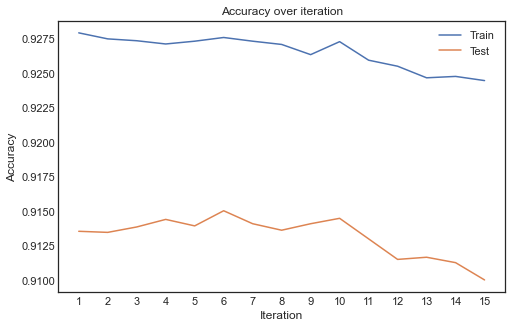

In [93]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_s_gb['iteration'], acc_full_s_gb['Training Accuracy'],label='Train')
plt.plot(acc_full_s_gb['iteration'], acc_full_s_gb['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_full_s_gb['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

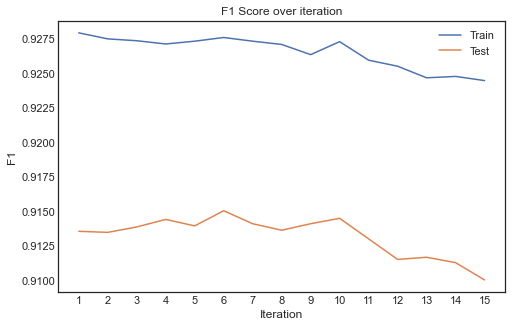

In [94]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_s_gb['iteration'], acc_full_s_gb['Training Accuracy'],label='Train')
plt.plot(acc_full_s_gb['iteration'], acc_full_s_gb['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(acc_full_s_gb['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

#### Balanced data SMOTE Train, Imbalanced data original data testing

##### Full list of variable

In [101]:
xvar_smote_gb_t, acc_smote_gb_t, f1s_smote_gb_t = gb_train(X_smote_train, X_full_test, y_smote_train, y_full_test, 
                                            threshold = 0.01, max_iter = 15, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.949; Testing Accuracy: 0.9142
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 0.9488; Testing Accuracy: 0.9135
Drop variable: loan_miss
-------------------------------------------
Iteration 3
Training Accuracy: 0.9495; Testing Accuracy: 0.9146
Drop variable: job_admin
-------------------------------------------
Iteration 4
Training Accuracy: 0.9482; Testing Accuracy: 0.9121
Drop variable: balance_im
-------------------------------------------
Iteration 5
Training Accuracy: 0.9484; Testing Accuracy: 0.9134
Drop variable: contact_cellular
-------------------------------------------
Iteration 6
Training Accuracy: 0.9484; Testing Accuracy: 0.9136
Drop variable: pdays_neg_1
-------------------------------------------
Iteration 7
Training Accuracy: 0.9477; Testing Accuracy: 0.9114
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 8

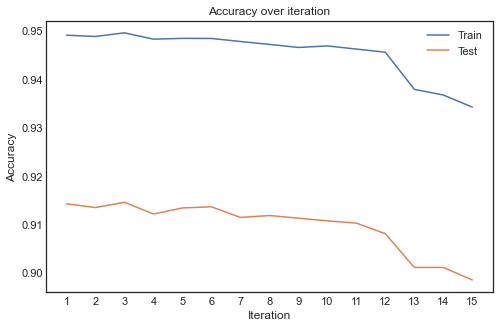

In [102]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_smote_gb_t['iteration'], acc_smote_gb_t['Training Accuracy'],label='Train')
plt.plot(acc_smote_gb_t['iteration'], acc_smote_gb_t['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_smote_gb_t['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

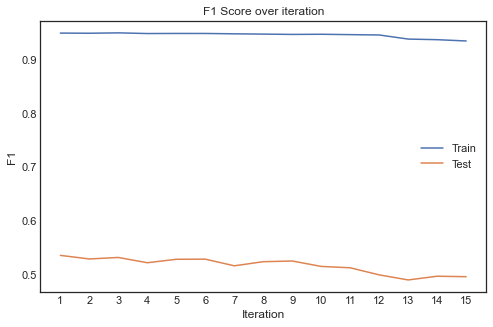

In [103]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(f1s_smote_gb_t['iteration'], f1s_smote_gb_t['Training Accuracy'],label='Train')
plt.plot(f1s_smote_gb_t['iteration'], f1s_smote_gb_t['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(f1s_smote_gb_t['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

##### Small list of variable

In [96]:
xvar_smote_s_gb_t, acc_smote_s_gb_t, f1s_smote_s_gb_t = gb_train(X_smote_s_train, X_full_s_test, y_smote_s_train, y_full_s_test, 
                                            threshold = 0.01, max_iter = 15, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9468; Testing Accuracy: 0.912
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 0.947; Testing Accuracy: 0.9121
Drop variable: loan_miss
-------------------------------------------
Iteration 3
Training Accuracy: 0.946; Testing Accuracy: 0.911
Drop variable: balance_im
-------------------------------------------
Iteration 4
Training Accuracy: 0.9461; Testing Accuracy: 0.9102
Drop variable: job_admin
-------------------------------------------
Iteration 5
Training Accuracy: 0.9462; Testing Accuracy: 0.9109
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 6
Training Accuracy: 0.9459; Testing Accuracy: 0.9114
Drop variable: job_services
-------------------------------------------
Iteration 7
Training Accuracy: 0.9452; Testing Accuracy: 0.9103
Drop variable: loan_im_n
-------------------------------------------
Iteration 8
Training

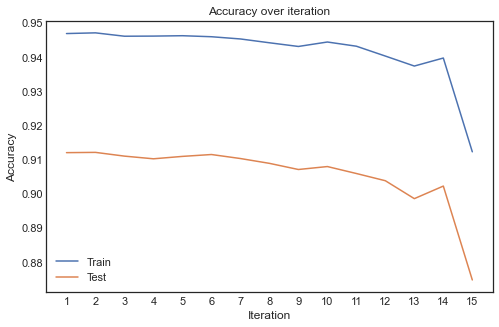

In [98]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_smote_s_gb_t['iteration'], acc_smote_s_gb_t['Training Accuracy'],label='Train')
plt.plot(acc_smote_s_gb_t['iteration'], acc_smote_s_gb_t['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_smote_s_gb_t['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

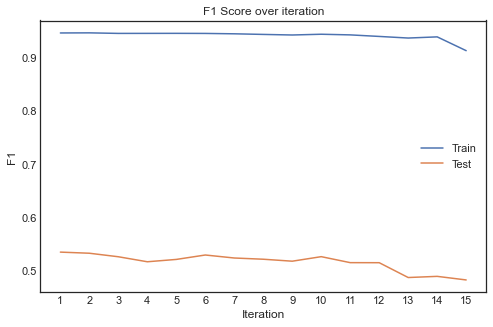

In [100]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(f1s_smote_s_gb_t['iteration'], f1s_smote_s_gb_t['Training Accuracy'],label='Train')
plt.plot(f1s_smote_s_gb_t['iteration'], f1s_smote_s_gb_t['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(f1s_smote_s_gb_t['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

#### Imbalanced data train, balanced data testing

##### Full list of variables

In [107]:
xvar_full_gb_t, acc_full_gb_tt, f1s_full_gb_tt = gb_train(X_full_train, X_smote_test, y_full_train, y_smote_test, 
                                            threshold = 0.01, max_iter = 15, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9312; Testing Accuracy: 0.6669
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 0.9306; Testing Accuracy: 0.6669
Drop variable: job_services
-------------------------------------------
Iteration 3
Training Accuracy: 0.9322; Testing Accuracy: 0.6631
Drop variable: education_secondary
-------------------------------------------
Iteration 4
Training Accuracy: 0.9306; Testing Accuracy: 0.6695
Drop variable: job_admin
-------------------------------------------
Iteration 5
Training Accuracy: 0.9305; Testing Accuracy: 0.6706
Drop variable: loan_miss
-------------------------------------------
Iteration 6
Training Accuracy: 0.9305; Testing Accuracy: 0.6699
Drop variable: job_blue_collar
-------------------------------------------
Iteration 7
Training Accuracy: 0.9308; Testing Accuracy: 0.6692
Drop variable: job_no_ft_work
-------------------------------------------
I

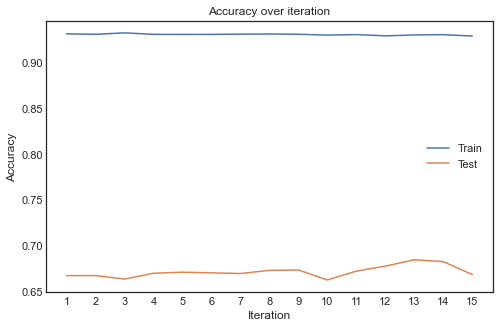

In [108]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_gb_tt['iteration'], acc_full_gb_tt['Training Accuracy'],label='Train')
plt.plot(acc_full_gb_tt['iteration'], acc_full_gb_tt['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_full_gb_tt['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

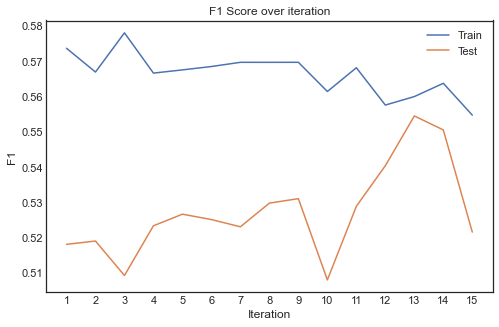

In [109]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(f1s_full_gb_tt['iteration'], f1s_full_gb_tt['Training Accuracy'],label='Train')
plt.plot(f1s_full_gb_tt['iteration'], f1s_full_gb_tt['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(f1s_full_gb_tt['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

##### Small list of variables

In [104]:
xvar_full_s_gb_t, acc_full_s_gb_tt, f1s_full_s_gb_tt = gb_train(X_full_s_train, X_smote_s_test, y_full_s_train, y_smote_s_test, 
                                            threshold = 0.01, max_iter = 15, learning_rate=0.1,
                                            n_estimators = 500, random_state = 42)

-------------------------------------------
Iteration 1
Training Accuracy: 0.9279; Testing Accuracy: 0.717
Drop variable: default_n
-------------------------------------------
Iteration 2
Training Accuracy: 0.9275; Testing Accuracy: 0.7131
Drop variable: job_admin
-------------------------------------------
Iteration 3
Training Accuracy: 0.9273; Testing Accuracy: 0.7239
Drop variable: job_services
-------------------------------------------
Iteration 4
Training Accuracy: 0.9271; Testing Accuracy: 0.7222
Drop variable: loan_miss
-------------------------------------------
Iteration 5
Training Accuracy: 0.9273; Testing Accuracy: 0.7168
Drop variable: job_no_ft_work
-------------------------------------------
Iteration 6
Training Accuracy: 0.9276; Testing Accuracy: 0.7262
Drop variable: education_secondary
-------------------------------------------
Iteration 7
Training Accuracy: 0.9273; Testing Accuracy: 0.7184
Drop variable: job_management
-------------------------------------------
Ite

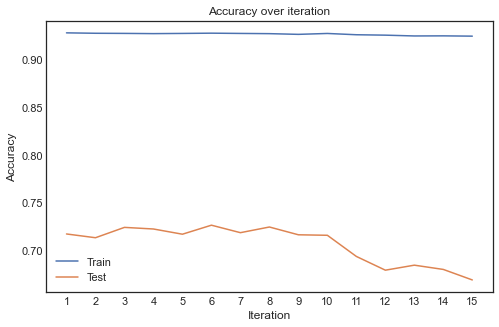

In [106]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(acc_full_s_gb_tt['iteration'], acc_full_s_gb_tt['Training Accuracy'],label='Train')
plt.plot(acc_full_s_gb_tt['iteration'], acc_full_s_gb_tt['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(acc_full_s_gb_tt['iteration'])
plt.legend()
plt.title('Accuracy over iteration')
plt.show()

Text(0.5, 1.0, 'F1 Score over iteration')

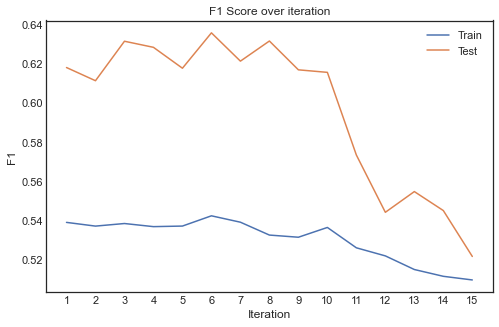

In [105]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(f1s_full_s_gb_tt['iteration'], f1s_full_s_gb_tt['Training Accuracy'],label='Train')
plt.plot(f1s_full_s_gb_tt['iteration'], f1s_full_s_gb_tt['Testing Accuracy'],label='Test')
plt.xlabel('Iteration')
plt.ylabel('F1')
plt.xticks(f1s_full_s_gb_tt['iteration'])
plt.legend()
plt.title('F1 Score over iteration')

## Final Model Presentation   

**Final candidate models** 

- Logistic regression     
pros: interpretable results            
cons: less good prediction accuracy            

- Random Forest         
pros: perform okay in testing data                     
cons: overfitting issue in training data   

- Gradient boosting        
pros: perform good without necessity of feature reduction           
cons: ...



**Sample development approach**
All models were developed based on SMOTE data. SMOTE data, based on my test, provide more generality over various samples. However, when I use the original sample to build the model, which is an imbalance dataset, it works well on the original testing but imbalanced data but perform bad in a balanced data. For other approach, downsampling might lose some information, and individual weight might be applicable for tree-based models. Hence, I think SMOTE data are more appropriate.

### Best of my Logistic Regression

In [161]:
x_var_list = X_smote_s_train.columns.tolist()
x_var_list.remove('balance_im')
x_var_list.remove('age_im')

log_smote_small_final=sm.Logit(y_smote_s_train,sm.add_constant(X_smote_s_train[x_var_list])).fit()
print(log_smote_small_final.summary2())

Optimization terminated successfully.
         Current function value: 0.253828
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.634     
Dependent Variable:  y_n               AIC:               27326.5512
Date:                2022-04-28 20:18  BIC:               27486.6117
No. Observations:    53758             Log-Likelihood:    -13645.   
Df Model:            17                LL-Null:           -37262.   
Df Residuals:        53740             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                2.0989   0.0478  43.9292 0.0000  2.0052  2.1925
q1_flag             -1.3155 

In [162]:
y_pred_log=log_smote_small_final.predict(sm.add_constant(X_smote_s_test[x_var_list]))
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_smote_s_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_smote_s_test, y_pred_log_b))

Accuracy: 0.9041232638888889
F1 Score: 0.904968810496881


In [164]:
y_pred_log=log_smote_small_final.predict(sm.add_constant(X_full_s_test[x_var_list]))
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_full_s_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_full_s_test, y_pred_log_b))

Accuracy: 0.8679186228482003
F1 Score: 0.4395750332005312


### Best of my Random Forest Model

In [191]:
from sklearn.model_selection import RandomizedSearchCV

#### Original Run

In [438]:
rf_final = RandomForestClassifier(n_estimators = 1000, random_state = 123, max_features = 0.8)
rf_final.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_features=0.8, n_estimators=1000, random_state=123)

In [439]:
y_pred_log=rf_final.predict(X_smote_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_smote_test, y_pred_log_b))

Accuracy: 0.9421875
F1 Score: 0.9427392313644571


In [440]:
y_pred_log=rf_final.predict(X_full_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_full_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_full_test, y_pred_log_b))

Accuracy: 0.9615805946791862
F1 Score: 0.8064643279463933


#### Hyperparameter tuning

In [194]:
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [195]:
max_depth = [int(x) for x in np.linspace(5, 20, num = 15)]
max_features = [x for x in np.linspace(0.1, 0.8, num = 15)]
min_samples_leaf = [int(x) for x in np.linspace(5, 20, num = 15)]
# learning_rate = [x for x in np.linspace(0.01,0.1, num = 15)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
#               ,'learning_rate':learning_rate}

rfm = RandomForestClassifier(n_estimators = 500, random_state = 42)

rfm_random = RandomizedSearchCV(estimator = rfm, 
                                 param_distributions = random_grid,
                                 scoring = 'f1',
                                 n_iter = 10, 
                                 random_state=123, 
                                 verbose=1, 
                                 n_jobs = -1)

rfm_random.fit(X_smote_train, y_smote_train)

h1 = rfm_random.best_params_['min_samples_leaf']
h2 = rfm_random.best_params_['max_features']
h3 = rfm_random.best_params_['max_depth']
# h4 = rfm_random.best_params_['learning_rate']



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(max_depth=20, max_features=0.55, min_samples_leaf=6,
                       random_state=123)

In [196]:
print('Best min_samples_leaf is ', h1)
print('Best max_features is ', h2)
print('Best max_depth is ', h3)
#print('Best learning_rate is ', h4)

Best min_samples_leaf is  6
Best max_features is  0.55
Best max_depth is  20


In [430]:
rf_final_ft = RandomForestClassifier(n_estimators=1000, 
                                         min_samples_leaf=6,
                                         max_features=0.55, 
                                         max_depth=20,
#                                         learning_rate = h4,
                                         verbose=0,
                                         random_state = 123)

rf_final_ft.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_depth=20, max_features=0.55, min_samples_leaf=6,
                       n_estimators=1000, random_state=123)

In [431]:
y_pred_log=rf_final_ft.predict(X_smote_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_smote_test, y_pred_log_b))

Accuracy: 0.9362413194444444
F1 Score: 0.9370095621971614


In [432]:
y_pred_log=rf_final_ft.predict(X_full_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_full_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_full_test, y_pred_log_b))

Accuracy: 0.9262128325508607
F1 Score: 0.6448210922787193


### Best of my Gradient Boosting Model   

#### Original Run

In [175]:
gb_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 500, random_state = 42)
gb_final.fit(X_smote_train, y_smote_train)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [176]:
y_pred_log=gb_final.predict(X_smote_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_smote_test, y_pred_log_b))

Accuracy: 0.9422309027777778
F1 Score: 0.9420119374373721


In [178]:
y_pred_log=gb_final.predict(X_full_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_full_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_full_test, y_pred_log_b))

Accuracy: 0.9140845070422535
F1 Score: 0.5246753246753246


#### Hyperparameter tuning

In [187]:
max_depth = [int(x) for x in np.linspace(5, 20, num = 15)]
max_features = [x for x in np.linspace(0.1, 0.8, num = 15)]
min_samples_leaf = [int(x) for x in np.linspace(5, 20, num = 15)]
learning_rate = [x for x in np.linspace(0.01,0.1, num = 15)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate':learning_rate}

gbm = GradientBoostingClassifier(n_estimators = 500, random_state = 42)

gbm_random = RandomizedSearchCV(estimator = gbm, 
                                 param_distributions = random_grid,
                                 scoring = 'f1',
                                 n_iter = 10, 
                                 random_state=123, 
                                 verbose=1, 
                                 n_jobs = -1)

gbm_random.fit(X_smote_train, y_smote_train)

h1 = gbm_random.best_params_['min_samples_leaf']
h2 = gbm_random.best_params_['max_features']
h3 = gbm_random.best_params_['max_depth']
h4 = gbm_random.best_params_['learning_rate']


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GradientBoostingClassifier(learning_rate=0.09357142857142857, max_depth=15,
                           max_features=0.35, min_samples_leaf=8,
                           random_state=123)

In [188]:
print('Best min_samples_leaf is ', h1)
print('Best max_features is ', h2)
print('Best max_depth is ', h3)
print('Best learning_rate is ', h4)

Best min_samples_leaf is  8
Best max_features is  0.35
Best max_depth is  15
Best learning_rate is  0.09357142857142857


In [433]:
gb_final_ft = GradientBoostingClassifier(n_estimators=100, 
                                         min_samples_leaf=8,
                                         max_features=0.35, 
                                         max_depth=15,
                                         learning_rate = 0.09357142857142857,
                                         verbose=0,
                                         random_state = 123)

gb_final_ft.fit(X_smote_train, y_smote_train)

GradientBoostingClassifier(learning_rate=0.09357142857142857, max_depth=15,
                           max_features=0.35, min_samples_leaf=8,
                           random_state=123)

In [434]:
y_pred_log=gb_final_ft.predict(X_smote_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_smote_test, y_pred_log_b))

Accuracy: 0.9489149305555555
F1 Score: 0.949085088895618


In [435]:
y_pred_log=gb_final_ft.predict(X_full_test)
p_threshold = 0.5
y_pred_log_b = np.where(y_pred_log > p_threshold, 1, 0)
print("Accuracy:",metrics.accuracy_score(y_full_test, y_pred_log_b))
print("F1 Score:",metrics.f1_score(y_full_test, y_pred_log_b))

Accuracy: 0.9643974960876369
F1 Score: 0.8148148148148148


### Comparison

- Logistic Regression       
- Random Forest, initial run      
- Gradient boosting, fine-tuning

#### SMOTE testing data

In [450]:
x_var_list_log = ['q1_flag', 'q3_flag', 'duration_im', 'campaign_im', 'pdays_neg_1', 'default_n', 'housing_n', 'loan_im_n',
                  'loan_miss', 'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work', 'marital_married',
                  'education_secondary', 'contact_unknown']

X_t = X_smote_test
y_t = y_smote_test

y_pred_log = log_smote_small_final.predict(sm.add_constant(X_t[x_var_list_log]))
y_pred_rf = rf_final.predict_proba(X_t)[:,1]
y_pred_gb = gb_final_ft.predict_proba(X_t)[:,1]

threshold = 0.5
y_pred_b_log = np.array((y_pred_log > threshold).astype(int))
y_pred_b_rf = rf_final.predict(X_t)
y_pred_b_gb = gb_final_ft.predict(X_t)

##### ROC curve

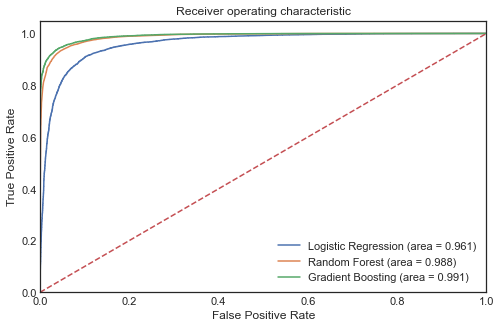

In [451]:
# Logistic
log_roc_auc = metrics.roc_auc_score(y_t, y_pred_log)
fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_t, y_pred_log)
# RF
rfm_roc_auc = metrics.roc_auc_score(y_t, y_pred_rf)
fpr_rfm, tpr_rfm, thresholds_rfm = metrics.roc_curve(y_t, y_pred_rf)
# GB
gbm_roc_auc = metrics.roc_auc_score(y_t, y_pred_gb)
fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(y_t, y_pred_gb)
# plot
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.3f)' % log_roc_auc)
plt.plot(fpr_rfm, tpr_rfm, label='Random Forest (area = %0.3f)' % rfm_roc_auc)
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting (area = %0.3f)' % gbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')
plt.show()

##### Precision-Recall Curve

Logistic Regression: f1=0.905 auc=0.958
Random Forest: f1=0.943 auc=0.989
Gradient Boosting: f1=0.949 auc=0.992


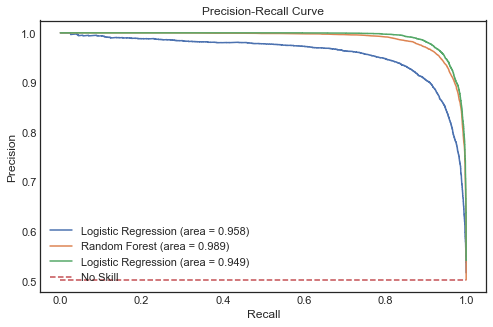

In [452]:
# Logistic
precision_log, recall_log, _ = metrics.precision_recall_curve(y_t, y_pred_log)
log_f1, log_auc = metrics.f1_score(y_t, y_pred_b_log), metrics.auc(recall_log, precision_log)
# RF
precision_rfm, recall_rfm, _ = metrics.precision_recall_curve(y_t, y_pred_rf)
rfm_f1, rfm_auc = metrics.f1_score(y_t, y_pred_b_rf), metrics.auc(recall_rfm, precision_rfm)
# GB
precision_gbm, recall_gbm, _ = metrics.precision_recall_curve(y_t, y_pred_gb)
gbm_f1, gbm_auc = metrics.f1_score(y_t, y_pred_b_gb), metrics.auc(recall_gbm, precision_gbm)

no_skill = len(y_t[y_t==1]) / len(y_t)

print('Logistic Regression: f1=%.3f auc=%.3f' % (log_f1, log_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rfm_f1, rfm_auc))
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gbm_f1, gbm_auc))

# plot
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(recall_log, precision_log, label='Logistic Regression (area = %0.3f)' % log_auc)
plt.plot(recall_rfm, precision_rfm, label='Random Forest (area = %0.3f)' % rfm_auc)
plt.plot(recall_gbm, precision_gbm, label='Logistic Regression (area = %0.3f)' % gbm_f1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('PR_ROC.png')
plt.show()

#### Original data

In [445]:
x_var_list_log = ['q1_flag', 'q3_flag', 'duration_im', 'campaign_im', 'pdays_neg_1', 'default_n', 'housing_n', 'loan_im_n',
                  'loan_miss', 'job_blue_collar', 'job_management', 'job_admin', 'job_services', 'job_no_ft_work', 'marital_married',
                  'education_secondary', 'contact_unknown']

X_t = X_full_test
y_t = y_full_test

y_pred_log = log_smote_small_final.predict(sm.add_constant(X_t[x_var_list_log]))
y_pred_rf = rf_final.predict_proba(X_t)[:,1]
y_pred_gb = gb_final_ft.predict_proba(X_t)[:,1]

threshold = 0.5
y_pred_b_log = np.array((y_pred_log > threshold).astype(int))
y_pred_b_rf = rf_final.predict(X_t)
y_pred_b_gb = gb_final_ft.predict(X_t)

##### ROC curve

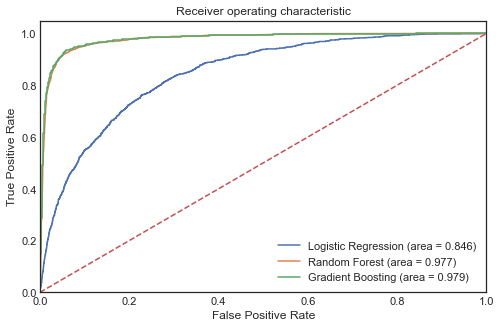

In [446]:
# Logistic
log_roc_auc = metrics.roc_auc_score(y_t, y_pred_log)
fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_t, y_pred_log)
# RF
rfm_roc_auc = metrics.roc_auc_score(y_t, y_pred_rf)
fpr_rfm, tpr_rfm, thresholds_rfm = metrics.roc_curve(y_t, y_pred_rf)
# GB
gbm_roc_auc = metrics.roc_auc_score(y_t, y_pred_gb)
fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(y_t, y_pred_gb)
# plot
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.3f)' % log_roc_auc)
plt.plot(fpr_rfm, tpr_rfm, label='Random Forest (area = %0.3f)' % rfm_roc_auc)
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting (area = %0.3f)' % gbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')
plt.show()

##### Precision-Recall curve 

Logistic Regression: f1=0.440 auc=0.389
Random Forest: f1=0.806 auc=0.826
Gradient Boosting: f1=0.815 auc=0.853


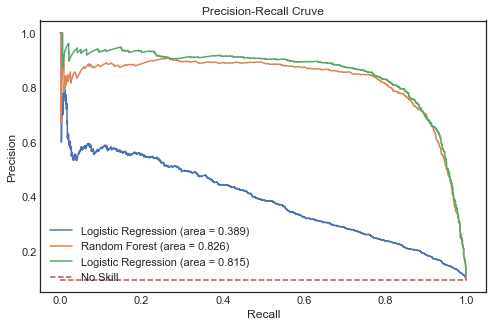

In [447]:
# Logistic
precision_log, recall_log, _ = metrics.precision_recall_curve(y_t, y_pred_log)
log_f1, log_auc = metrics.f1_score(y_t, y_pred_b_log), metrics.auc(recall_log, precision_log)
# RF
precision_rfm, recall_rfm, _ = metrics.precision_recall_curve(y_t, y_pred_rf)
rfm_f1, rfm_auc = metrics.f1_score(y_t, y_pred_b_rf), metrics.auc(recall_rfm, precision_rfm)
# GB
precision_gbm, recall_gbm, _ = metrics.precision_recall_curve(y_t, y_pred_gb)
gbm_f1, gbm_auc = metrics.f1_score(y_t, y_pred_b_gb), metrics.auc(recall_gbm, precision_gbm)

no_skill = len(y_t[y_t==1]) / len(y_t)

print('Logistic Regression: f1=%.3f auc=%.3f' % (log_f1, log_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rfm_f1, rfm_auc))
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gbm_f1, gbm_auc))

# plot
plt.style.use('seaborn-white')
plt.figure(figsize=(8, 5))
plt.plot(recall_log, precision_log, label='Logistic Regression (area = %0.3f)' % log_auc)
plt.plot(recall_rfm, precision_rfm, label='Random Forest (area = %0.3f)' % rfm_auc)
plt.plot(recall_gbm, precision_gbm, label='Logistic Regression (area = %0.3f)' % gbm_f1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Cruve')
plt.legend(loc="lower left")
plt.savefig('PR_ROC.png')
plt.show()

### Optimal model description  

**Gradient Boosting Model**  

- Training Data: SMOTE, over-sampled data.    
- Variables: Entire candidate variables as shown below.    
- Hyperparameters based on fine-tuned as shown below.     

**Rationle**

- Low need to reduce model complexity          
- High prediction accuracy              
- Generality for various testing data, i.e. balanced or imbalanced data             
- Short training time compared with RF             

In [448]:
# variable input
X_smote_train.columns.tolist()

# ['age_im', 'balance_im', 'q1_flag', 'q2_flag', 'q3_flag', 'duration_im', 'campaign_im', 'pdays_im', 
#  'pdays_neg_1', 'previous_im', 'default_n', 'housing_n', 'loan_im_n', 'loan_miss', 'job_blue_collar',
#  'job_management', 'job_admin', 'job_services', 'job_no_ft_work', 'marital_married', 'marital_single',
#  'education_secondary', 'education_tertiary', 'contact_cellular', 'contact_unknown']

['age_im',
 'balance_im',
 'q1_flag',
 'q2_flag',
 'q3_flag',
 'duration_im',
 'campaign_im',
 'pdays_im',
 'pdays_neg_1',
 'previous_im',
 'default_n',
 'housing_n',
 'loan_im_n',
 'loan_miss',
 'job_blue_collar',
 'job_management',
 'job_admin',
 'job_services',
 'job_no_ft_work',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'contact_cellular',
 'contact_unknown',
 'poutcome_success',
 'poutcome_unknown']

In [449]:
# Gradient Boosting Optimal Hyperparameters

gb_final_ft.get_params()

# {'ccp_alpha': 0.0,
# 'criterion': 'friedman_mse',
# 'init': None,
# 'learning_rate': 0.09357142857142857,
# 'loss': 'deviance',
# 'max_depth': 15,
# 'max_features': 0.35,
# 'max_leaf_nodes': None,
# 'min_impurity_decrease': 0.0,
# 'min_samples_leaf': 8,
# 'min_samples_split': 2,
# 'min_weight_fraction_leaf': 0.0,
# 'n_estimators': 100,
# 'n_iter_no_change': None,
# 'random_state': 123,
# 'subsample': 1.0,
# 'tol': 0.0001,
# 'validation_fraction': 0.1,
# 'verbose': 0,
# 'warm_start': False}

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.09357142857142857,
 'loss': 'deviance',
 'max_depth': 15,
 'max_features': 0.35,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}